# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite
def normal(x,mu,cov):
    a = 2*np.pi*np.linalg.det(cov)**0.5 
    sigma_inv = np.linalg.pinv(cov)
    mat1 = np.matmul(sigma_inv,(x-mu).T)
    ins = -0.5*np.matmul((x-mu),mat1)
    return (1/a)*np.exp(ins)

def cov(xtrain,mu):
    n = xtrain.shape[0]
    d = xtrain.shape[1]
    covar = np.zeros((d,d))
    for i in xtrain:
        h = np.expand_dims((i-mu),axis = 0)
        covar+=np.matmul(h.T,h)
    return (1/xtrain.shape[0])*covar

def convert(xtrain,ytrain,xtest):
    return np.array(xtrain), np.array(ytrain), np.array(xtest)

def eta(xtest,pi,mu_plus, mu_minus, cov_plus, cov_minus):
    eta = np.zeros(xtest.shape[0])
    for i,x in enumerate(xtest):
        a = pi* normal(x,mu_plus,cov_plus)
        eta[i] = (pi* normal(x,mu_plus,cov_plus))/(pi*normal(x,mu_plus,cov_plus) + (1-pi)*normal(x,mu_minus,cov_minus))
    return eta

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    #X_train, Y_train, X_test = convert(X_train, Y_train, X_test)
    xtrainplus = X_train[Y_train==1]
    xtrainminus = X_train[Y_train==-1]
    mu_plus = np.mean(xtrainplus,axis=0)
    mu_minus = np.mean(xtrainminus,axis=0)
    pi = (Y_train==1).sum()/X_train.shape[0]
    cov = np.eye(X_train.shape[1])
    eta_x = eta(X_test,pi,mu_plus, mu_minus, cov, cov)
    eta_x[eta_x>=0.5]=1
    eta_x[eta_x<0.5]=-1
    return eta_x
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train, Y_train, X_test = convert(X_train, Y_train, X_test)
    xtrainplus = X_train[Y_train==1]
    xtrainminus = X_train[Y_train==-1]
    mu_plus = np.mean(xtrainplus,axis=0)
    mu_minus = np.mean(xtrainminus,axis=0)
    mu = np.mean(X_train,axis=0)
    pi = (Y_train==1).sum()/X_train.shape[0]
    covar = cov(X_train,mu)
    eta_x = eta(X_test,pi,mu_plus, mu_minus, covar, covar)
    eta_x[eta_x>=0.5]=1
    eta_x[eta_x<0.5]=-1
    return eta_x

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train, Y_train, X_test = convert(X_train, Y_train, X_test)
    xtrainplus = X_train[Y_train==1]
    xtrainminus = X_train[Y_train==-1]
    pi = (Y_train==1).sum()/X_train.shape[0]
    mu_plus = np.mean(xtrainplus,axis=0)
    mu_minus = np.mean(xtrainminus,axis=0)
    cov_plus = cov(xtrainplus,mu_plus)
    cov_minus = cov(xtrainminus,mu_minus)
    eta_x = eta(X_test,pi,mu_plus, mu_minus, cov_plus, cov_minus)
    eta_x[eta_x>=0.5]=1
    eta_x[eta_x<0.5]=-1
    return eta_x

In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


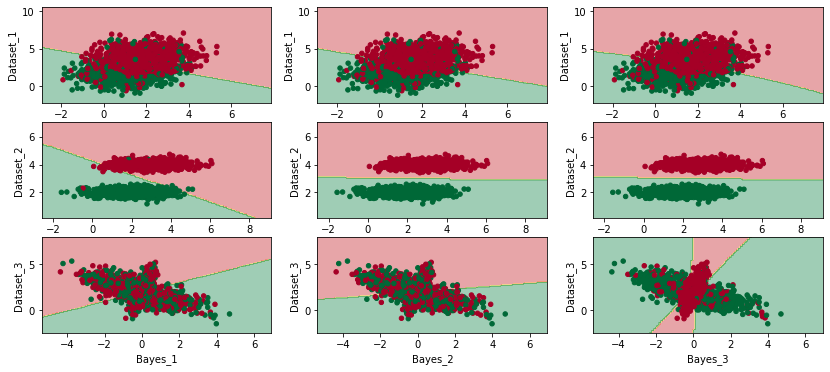

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
def plot(X_train,Y_train, ypred1, Bayes,axes,i,j):
    
    x_min, x_max = X_train[:, 0].min()-1, 1.5*X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min()-1, 1.5*X_train[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    Z = Bayes(X_train,Y_train,np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i][j].contourf(xx, yy, Z, alpha=0.4, cmap="RdYlGn")
    axes[i][j].scatter(X_train[:, 0], X_train[:, 1], c=ypred1, cmap="RdYlGn",
                              s=20)
    axes[i][j].set_xlabel("Bayes_{}".format(j+1))
    axes[i][j].set_ylabel("Dataset_{}".format(i+1))
    
    
def output_data(dataset,axes,i):
    data =   np.load(dataset)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    ypred1 = Bayes1a(X_train, Y_train, X_test)
    ypred2 = Bayes1b(X_train, Y_train, X_test)
    ypred3 = Bayes1c(X_train, Y_train, X_test)
#     print(dataset)
#     print("bayes-1a",np.sum(ypred1!=Y_test)/ypred1.shape[0])
#     print("bayes-1b",np.sum(ypred2!=Y_test)/ypred2.shape[0])
#     print("bayes-1c",np.sum(ypred3!=Y_test)/ypred3.shape[0])
    
#     pos_xtrain = X_train[Y_train==1]
#     neg_xtrain = X_train[Y_train==-1]
#     pos_xtest = X_test[ypred1==1]
#     neg_xtest = X_test[ypred1==-1]
    
#     x_min, x_max = X_train[:, 0].min()-1, 1.5*X_train[:, 0].max()
#     y_min, y_max = X_train[:, 1].min()-1, 1.5*X_train[:, 1].max()
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))
#     Z = Bayes1a(X_train,Y_train,np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     axes[0].contourf(xx, yy, Z, alpha=0.4, cmap="RdYlGn")
#     axes[0].scatter(X_train[:, 0], X_train[:, 1], c=ypred1, cmap="RdYlGn",
#                               s=20)
#     plt.show()
    plot(X_train,Y_train, ypred1, Bayes1a,axes,i,0)
    plot(X_train,Y_train, ypred2, Bayes1b,axes,i,1)
    plot(X_train,Y_train, ypred3, Bayes1c,axes,i,2)

fig,axes = plt.subplots(3,3,figsize=(14,6))  
output_data("../../Data/dataset1_1.npz",axes,0)
output_data("../../Data/dataset1_2.npz",axes,1)
output_data("../../Data/dataset1_3.npz",axes,2)
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)  
<font face='Courier New' size = 3 color = "Purple">  
- In cases 1 and 2, where covariance matrices are the same, the decision boundary in linear, however in case 3, the decision boundary need not be linear  
- When there is a clear boundary between the different classes, cases 2 and 3 perform well whereas  case 1 may not be able to generalize as well

__TABLE OF ERRORS__  
Lists Rate of misclasficantion =  $\frac{Number of misclassifications}{Total number of sample}$ 

Dataset|Bayes_1a|Bayes_1b|Bayes_1c|
----|----|---|----
Dataset1_1|0.126|0.1245|0.1245
Dataset1_2|0.0085|0.0|0.0
Dataset1_1|0.497|0.495|0.135

- From the table of error we can see that, in case of dataset1, with overlapping points, all of them perform similarly, in particular, Bayes_1c which is more complex than the other does not provide any significant advantage
- In dataset 2, we see that Bayes_1b, Bayes_1c make no errors. Thus when data is well separated they do a good job
- In dataset 3, we see that the data is complex to classify and hence a complex classifier like Bayes_1c does better than the other 2, which fail to generlaize well due to their simplicity


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell

def p(x,pi,mu_a, cov_a):
    prob = pi*normal(x,mu_a,cov_a)
    return prob

def eta_multiclass(pl):
    result = np.zeros(4)
    total = sum(pl)
    for i in range(4):
        result[i] = pl[i]/total
    return result
    

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    d = X_train.shape[1]
    mu1 = np.mean(X_train[Y_train==1],axis = 0)
    mu2 = np.mean(X_train[Y_train==2],axis = 0)
    mu3 = np.mean(X_train[Y_train==3],axis = 0)
    mu4 = np.mean(X_train[Y_train==4],axis=0)
    mu = np.array([mu1,mu2,mu3,mu4])
    cov = np.eye(d)
    classes, counts = np.unique(Y_train, return_counts = True)
    pi = counts/Y_train.shape[0] #prior probabilities
    Y_pred_test = np.zeros(X_test.shape[0])
    eta_total=[]
    for j,x in enumerate(X_test):
        prob_list = np.zeros(4) 
        for i in range(4):
            prob_list[i] = p(x,pi[i],mu[i],cov)
            
        eta_x = eta_multiclass(prob_list)
        eta_total.append(eta_x)
        pred_class = np.argmax(eta_x)+1
        Y_pred_test[j] = pred_class
    return Y_pred_test
    
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    d = X_train.shape[1]
    mu1 = np.mean(X_train[Y_train==1],axis = 0)
    mu2 = np.mean(X_train[Y_train==2],axis= 0)
    mu3 = np.mean(X_train[Y_train==3],axis = 0)
    mu4 = np.mean(X_train[Y_train==4],axis = 0)
    mu = np.array([mu1,mu2,mu3,mu4])
    mu_total = np.mean(X_train,axis = 0)
    covar = cov(X_train,mu_total)
    classes, counts = np.unique(Y_train, return_counts = True)
    pi = counts/Y_train.shape[0] #prior probabilities
    Y_pred_test = np.zeros(X_test.shape[0])
    eta_total=[]
    for j,x in enumerate(X_test):
        prob_list = np.zeros(4) 
        for i in range(4):
            prob_list[i] = p(x,pi[i],mu[i],covar)
            
        eta_x = eta_multiclass(prob_list)
        eta_total.append(eta_x)
        pred_class = np.argmax(eta_x)+1
        Y_pred_test[j] = pred_class
        
    return Y_pred_test

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    d = X_train.shape[1]
    mu1 = np.mean(X_train[Y_train==1],axis = 0)
    mu2 = np.mean(X_train[Y_train==2],axis= 0)
    mu3 = np.mean(X_train[Y_train==3],axis = 0)
    mu4 = np.mean(X_train[Y_train==4],axis = 0)
    mu = np.array([mu1,mu2,mu3,mu4])
    mu_total = np.mean(X_train,axis = 0)
    
    covar1 = cov(X_train[Y_train==1],mu1)
    covar2 = cov(X_train[Y_train==2],mu2)
    covar3 = cov(X_train[Y_train==3],mu3)
    covar4 = cov(X_train[Y_train==4],mu4)
    covar = [covar1, covar2, covar3, covar4]
    
    classes, counts = np.unique(Y_train, return_counts = True)
    
    pi = counts/Y_train.shape[0] 
    
    Y_pred_test = np.zeros(X_test.shape[0])
    eta_total = []
    for j,x in enumerate(X_test):
        prob_list = np.zeros(4) 
        for i in range(4):
            prob_list[i] = p(x,pi[i],mu[i],covar[i])
            
        eta_x = eta_multiclass(prob_list)
        eta_total.append(eta_x)
        pred_class = np.argmax(eta_x)+1
        Y_pred_test[j] = pred_class
        
    return Y_pred_test

In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate((np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


/home/shan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


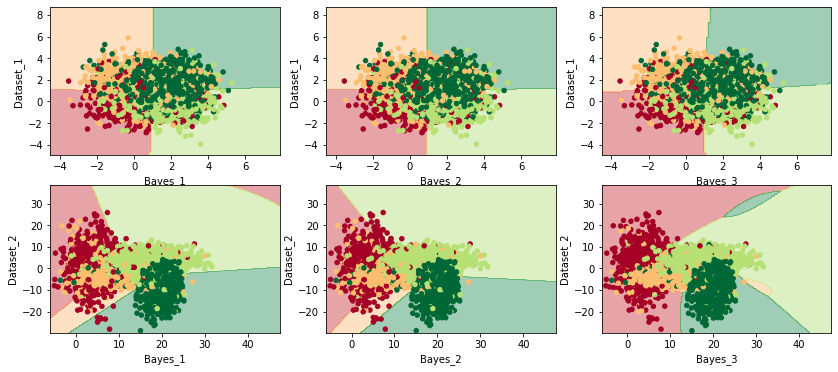

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
def plot(X_train,Y_train, ypred1, Bayes,axes,i,j):
    x_min, x_max = X_train[:, 0].min()-1, 1.5*X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min()-1, 1.5*X_train[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    Z = Bayes(X_train,Y_train,np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i][j].contourf(xx, yy, Z, alpha=0.4, cmap="RdYlGn")
    axes[i][j].scatter(X_train[:, 0], X_train[:, 1], c=ypred1, cmap="RdYlGn",
                              s=20)
    axes[i][j].set_xlabel("Bayes_{}".format(j+1))
    axes[i][j].set_ylabel("Dataset_{}".format(i+1))
    
def loss(eta_x,ytest):
    loss = 0
    L = np.array( [[ 0,1, 2, 3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    for i,output in enumerate(ytest):
        output = int(output)
        loss+=np.dot(eta_x[i],L[:,output-1].T)
    return loss

def output_data(dataset,axes,i):
    data = np.load(dataset)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    ypred1 = Bayes2a(X_train, Y_train, X_test)
    ypred2 = Bayes2b(X_train, Y_train, X_test)
#     print("eta_x2",eta_x2.shape)
#     print(np.unique(Y_train,return_counts=True))
    ypred3 = Bayes2c(X_train, Y_train, X_test)
    
    plot(X_train,Y_train, ypred1, Bayes2a,axes,i,0)
    plot(X_train,Y_train, ypred2, Bayes2b,axes,i,1)
    plot(X_train,Y_train, ypred3, Bayes2c,axes,i,2)
    
    
fig,axes = plt.subplots(2,3,figsize = (14,6))  
output_data("../../Data/dataset2_1.npz",axes,0)
output_data("../../Data/dataset2_2.npz",axes,1)
plt.show()

** Cell type : TextWrite ** 
(Write your observations and table of errors here)
<font face='Courier New' size = 3 color = "seagreen"><b>  
Loss Matrix
    
Dataset|Bayes_2a|Bayes_2b|Bayes_2c
---|---|---|---
Dataset2_1|0.6198517310410115|0.8171984438325507|0.6225881398063295
Dataset2_2|0.18322731529523506|0.6641482440094487|0.20221312140451392

Confusion Matrices:
Dataset-1   
- Bayes_2a: 
       [[700, 152, 126,  22],
       [138, 697,  26, 139],
       [115,  22, 733, 130],
       [ 24, 123, 124, 729]]
- Bayes_2b
       [[705, 147, 126,  22],
       [139, 696,  25, 140],
       [115,  22, 733, 130],
       [ 24, 123, 122, 731]]
- Bayes_2c
       [[700, 153, 125,  22],
       [140, 699,  26, 135],
       [115,  22, 733, 130],
       [ 24, 121, 127, 728]]
       
       
Dataset-2:  
- Bayes_2a:
       [[830, 150,  18,   2],
       [ 93, 784,  46,  77],
       [ 30,  61, 905,   4],
       [  0,  23,  78, 899]]
- Bayes_2b:
       [[844, 113,  42,   1],
       [106, 765,  52,  77],
       [ 25,  64, 908,   3],
       [  0,  17,  91, 892]]
- Bayes_2c:
       [[901,  79,  20,   0],
       [ 65, 829,  29,  77],
       [ 19,  34, 931,  16],
       [  0,  36,  39, 925]]
      
- From the above and loss table confusion matrices, we can see that in dataset-1 and 2, Bayes_2a does the best. In both cases, Bayes_2b does the worst. 
- This means that it is very likely that the true distribution of data has covariance close to 1 and the features are uncorrelated and hence independent. 
- There is strong indication that the data of different classes do not belong to the same distribution thus, covariance matrices are different
- On observing the confusion matrices, we can see that in all datasets and all algorithms, class 2 is the most misclassified. Thus class 2 must have similarities with the features of other classes, due to which the classifier makes mistakes
- On observing the plot, we see that in dataset-1, the classifiers divide the region into 4 portions linearly to classify, however in dataset-2, the boundaries are highly non-linear

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 432x288 with 0 Axes>

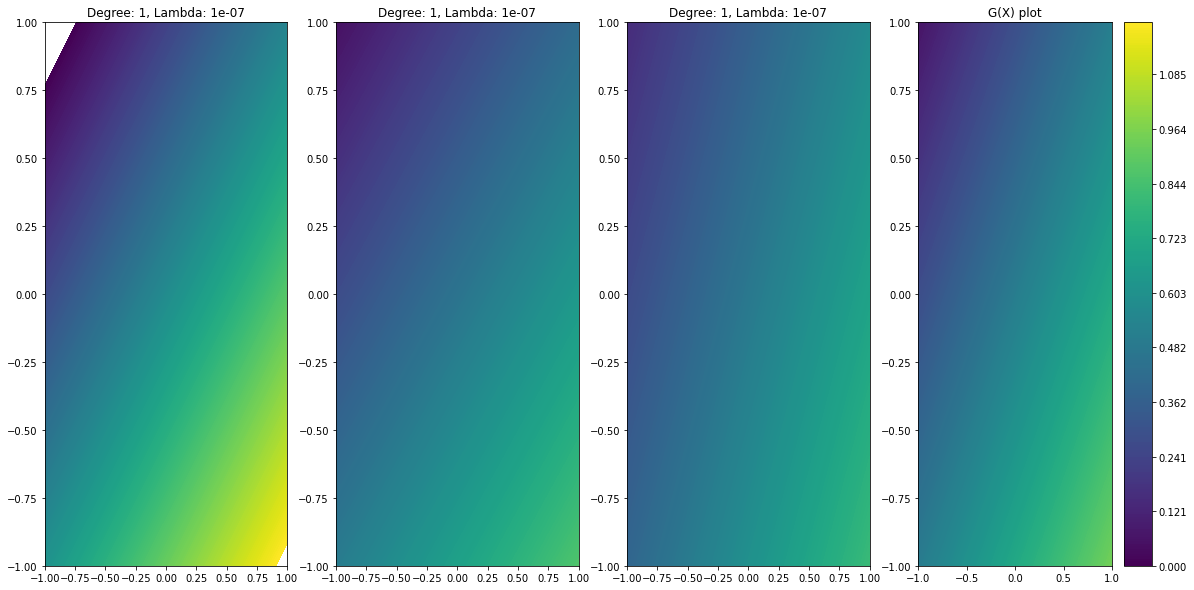

Degree= 1 lambda= 1e-07
Bias = 0.05323932142418594
Variance = 0.004778848326896937
MSE = 0.05801816975108288


<Figure size 432x288 with 0 Axes>

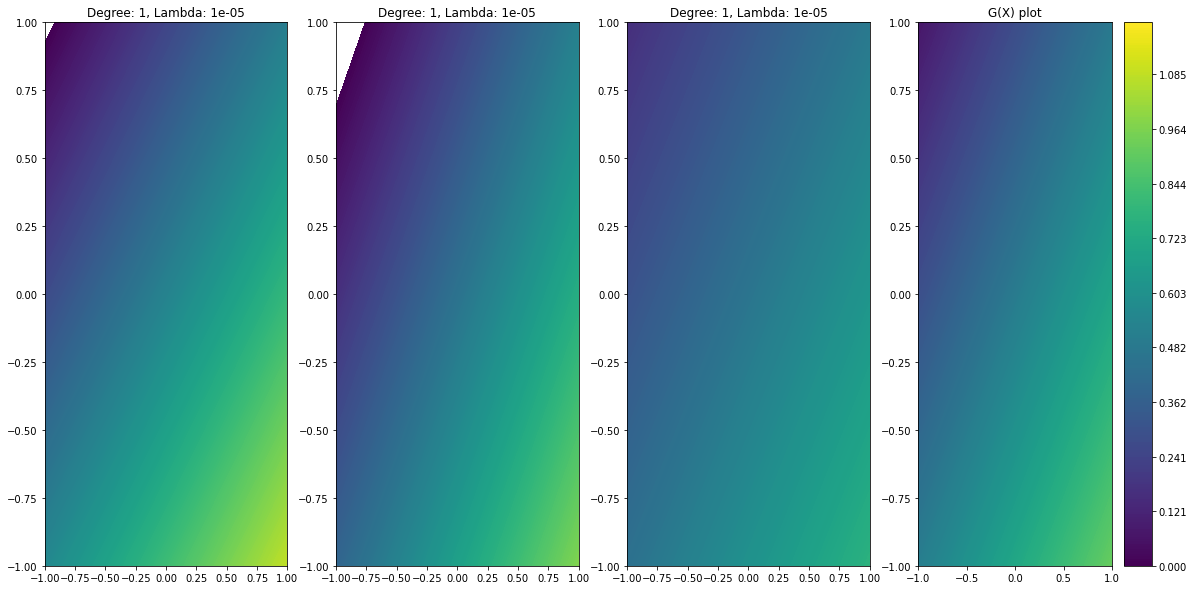

Degree= 1 lambda= 1e-05
Bias = 0.054223106238139474
Variance = 0.0036111587363748037
MSE = 0.05783426497451428


<Figure size 432x288 with 0 Axes>

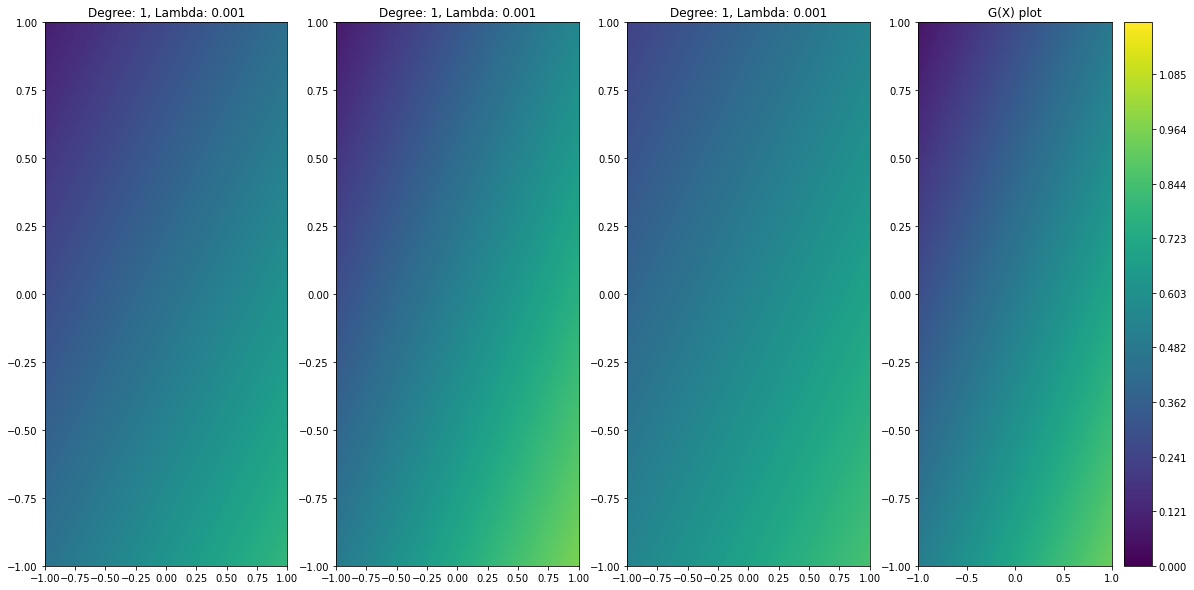

Degree= 1 lambda= 0.001
Bias = 0.05560171912677607
Variance = 0.003938241821937175
MSE = 0.05953996094871324


<Figure size 432x288 with 0 Axes>

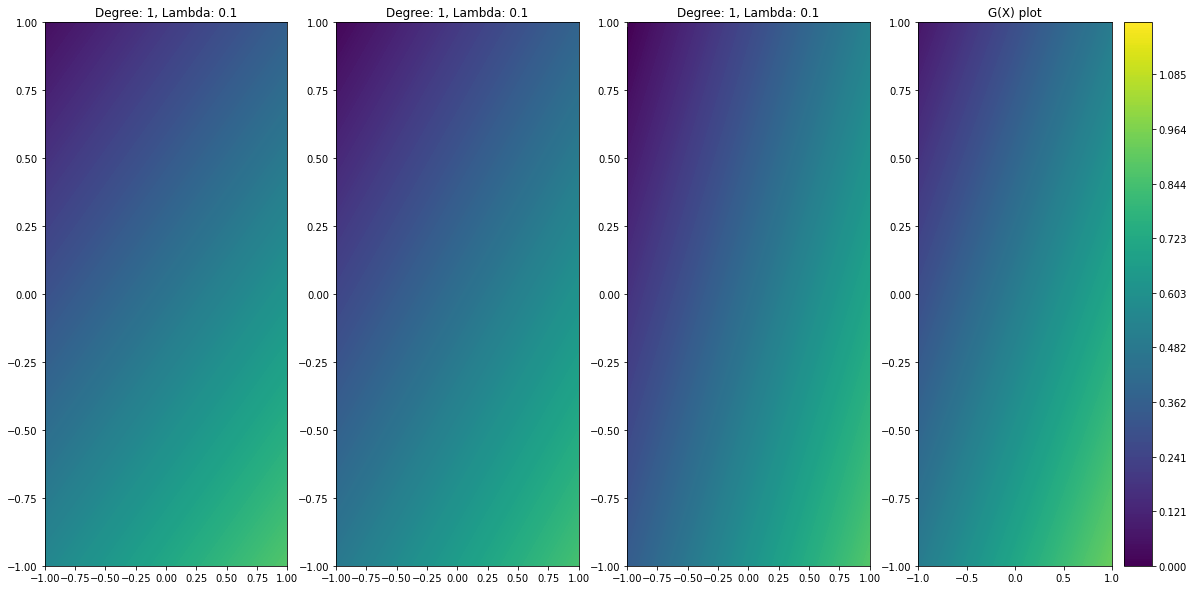

Degree= 1 lambda= 0.1
Bias = 0.05522426731679971
Variance = 0.0036951548265417716
MSE = 0.058919422143341484


<Figure size 432x288 with 0 Axes>

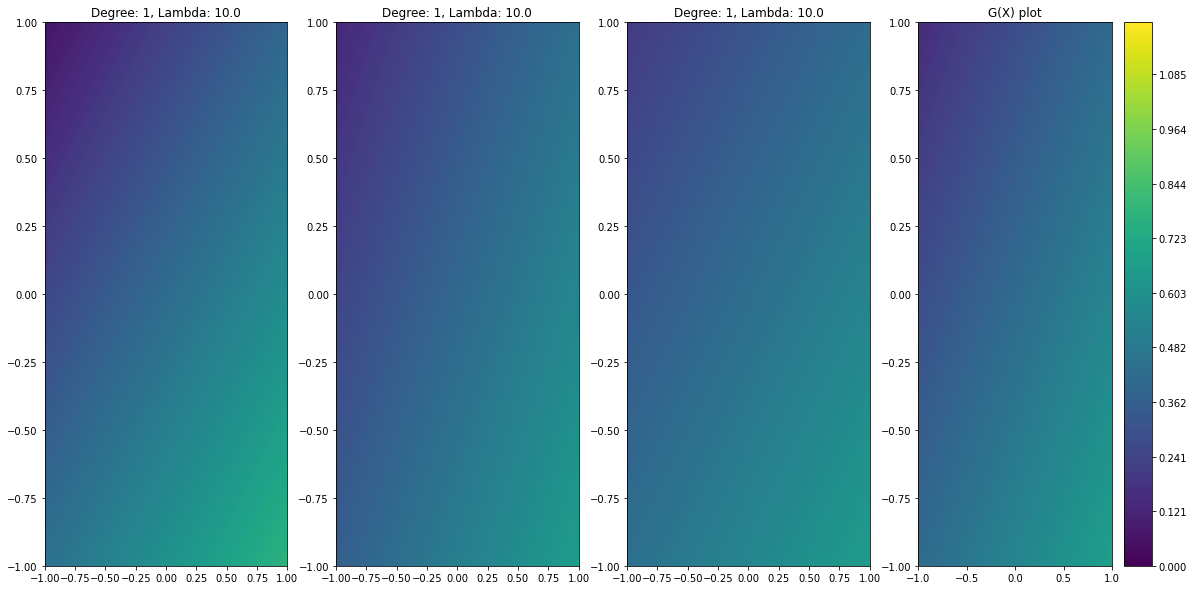

Degree= 1 lambda= 10.0
Bias = 0.07398241476118152
Variance = 0.0017846688388965404
MSE = 0.07576708360007806


<Figure size 432x288 with 0 Axes>

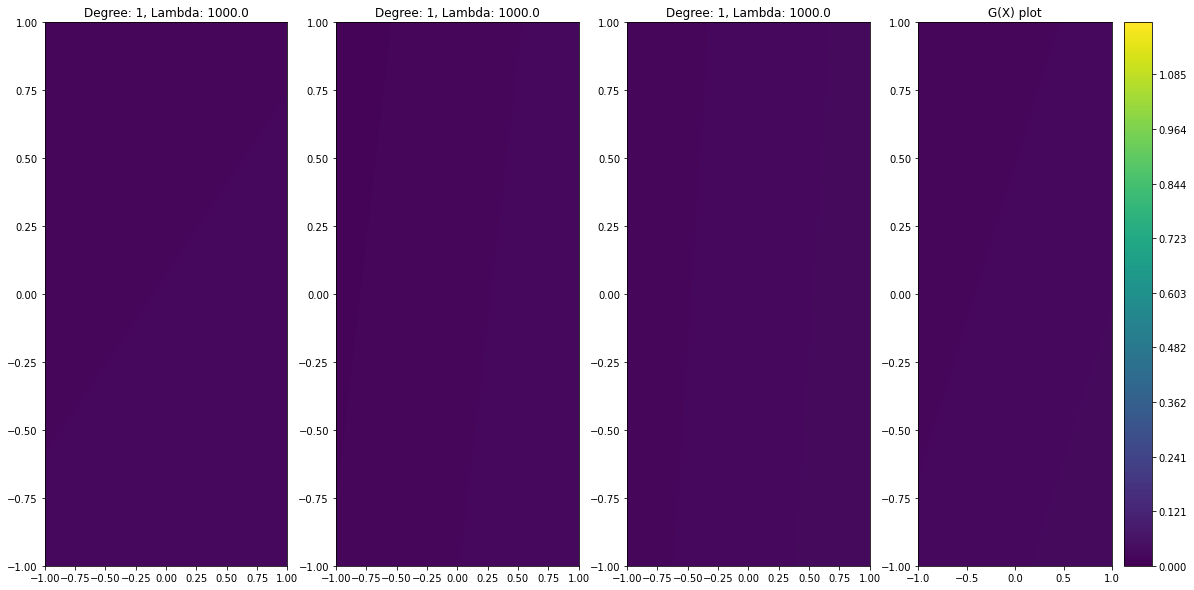

Degree= 1 lambda= 1000.0
Bias = 0.3137423584452041
Variance = 6.604109026009062e-06
MSE = 0.3137489625542301


<Figure size 432x288 with 0 Axes>

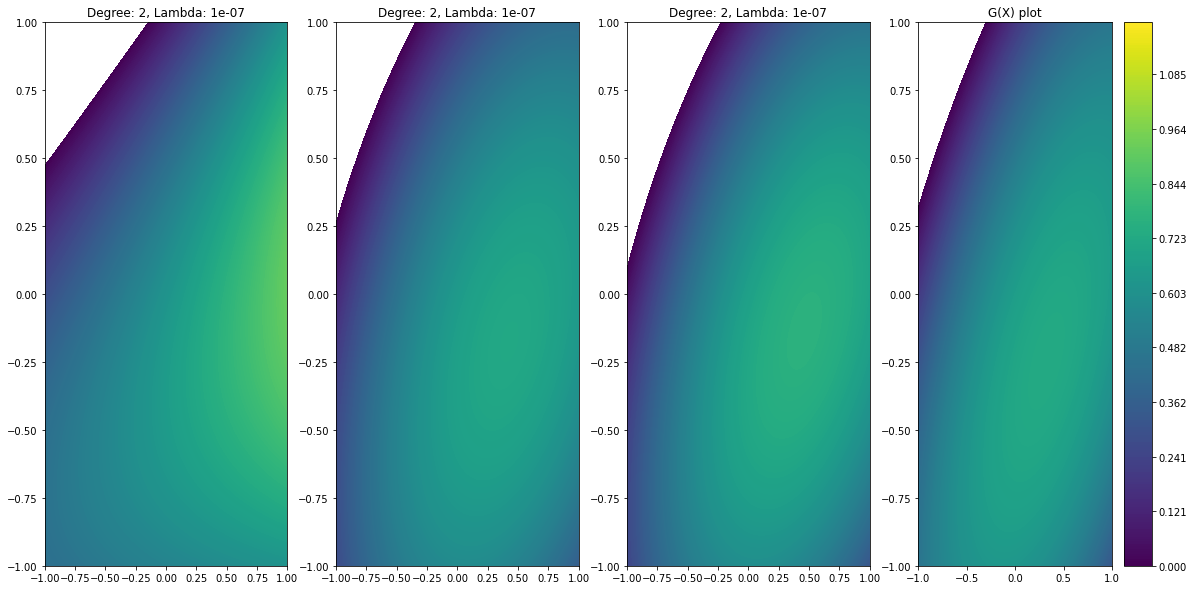

Degree= 2 lambda= 1e-07
Bias = 0.03347714876422412
Variance = 0.004904000930399642
MSE = 0.038381149694623765


<Figure size 432x288 with 0 Axes>

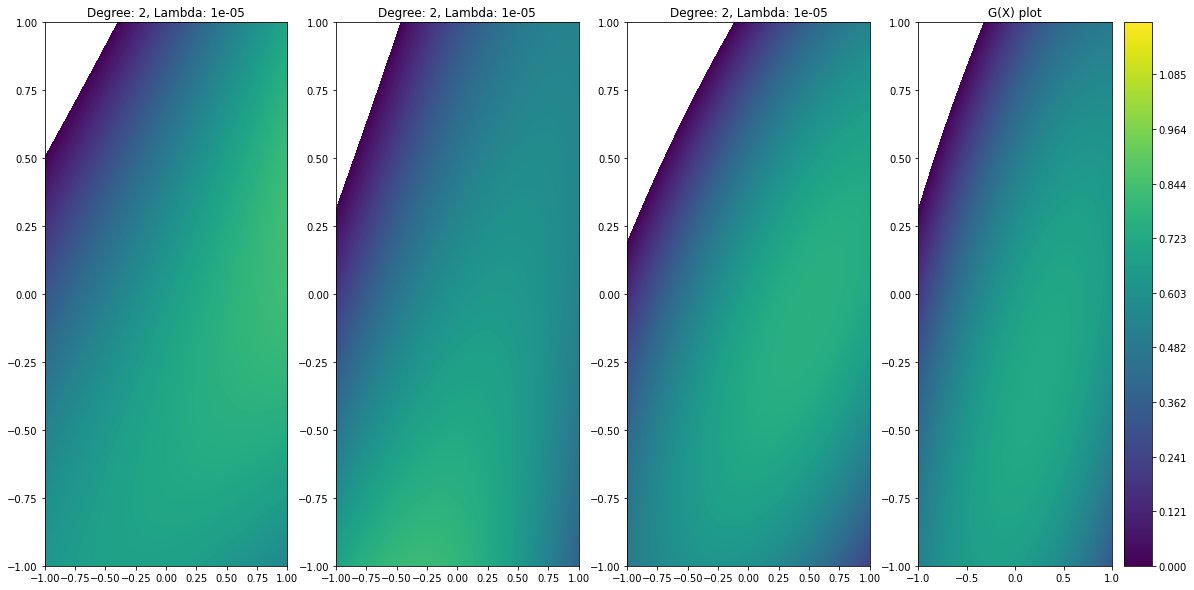

Degree= 2 lambda= 1e-05
Bias = 0.034613830985287364
Variance = 0.005556519153953642
MSE = 0.04017035013924101


<Figure size 432x288 with 0 Axes>

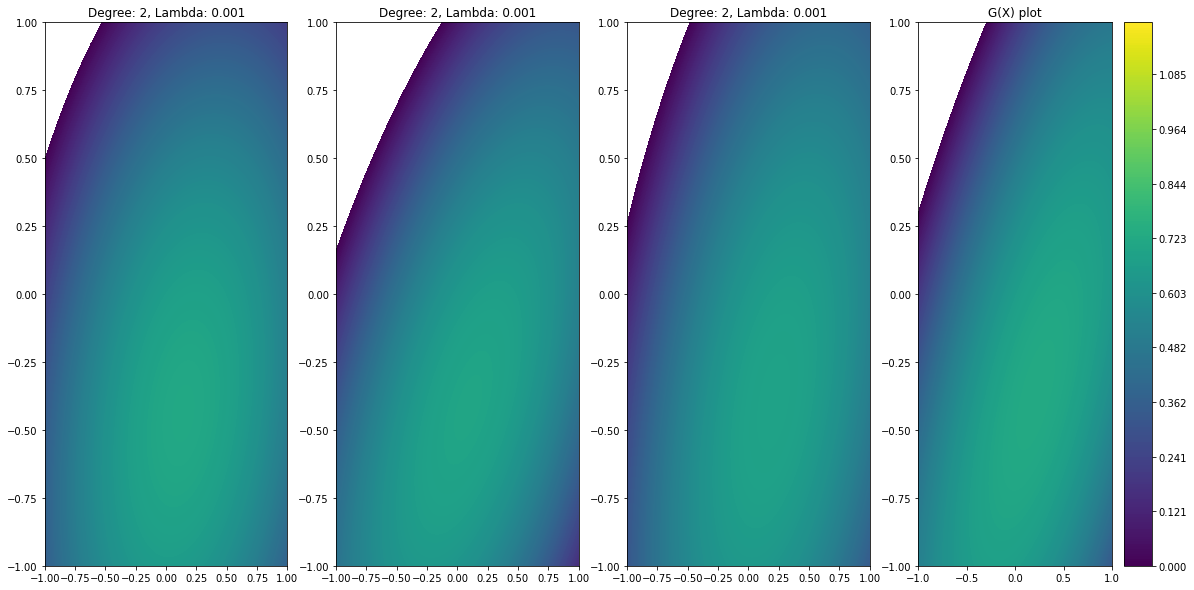

Degree= 2 lambda= 0.001
Bias = 0.033328820163098516
Variance = 0.005617310208362628
MSE = 0.03894613037146114


<Figure size 432x288 with 0 Axes>

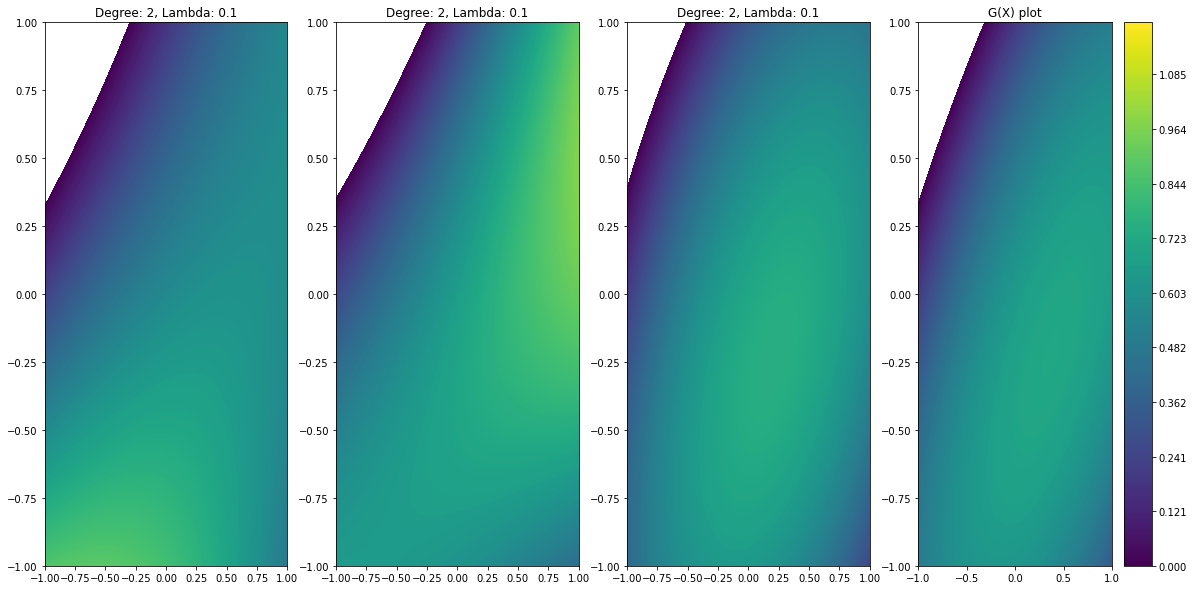

Degree= 2 lambda= 0.1
Bias = 0.034923497575839804
Variance = 0.0057444976661699095
MSE = 0.040667995242009716


<Figure size 432x288 with 0 Axes>

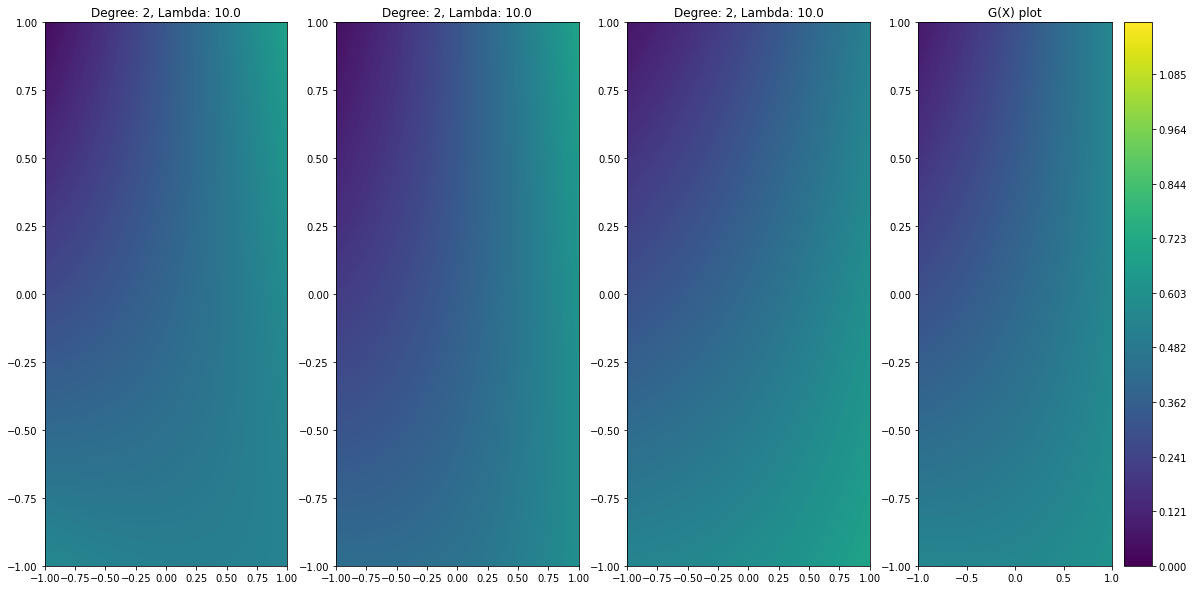

Degree= 2 lambda= 10.0
Bias = 0.06090598624250819
Variance = 0.0017352487942537964
MSE = 0.06264123503676199


<Figure size 432x288 with 0 Axes>

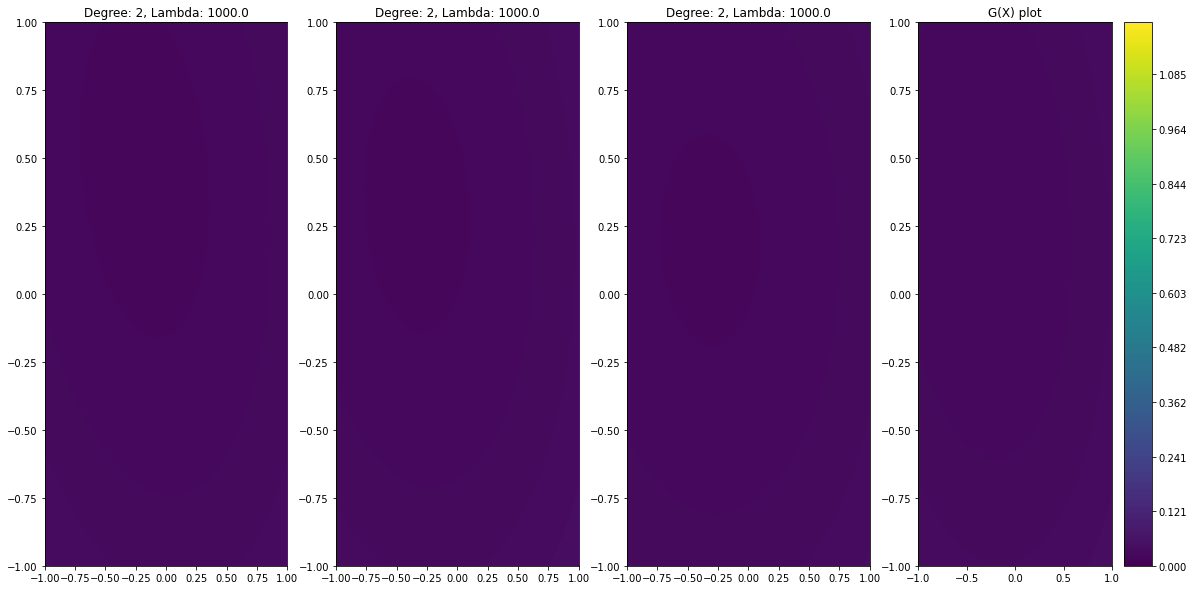

Degree= 2 lambda= 1000.0
Bias = 0.30271027026054
Variance = 9.109369098698332e-06
MSE = 0.3027193796296387


<Figure size 432x288 with 0 Axes>

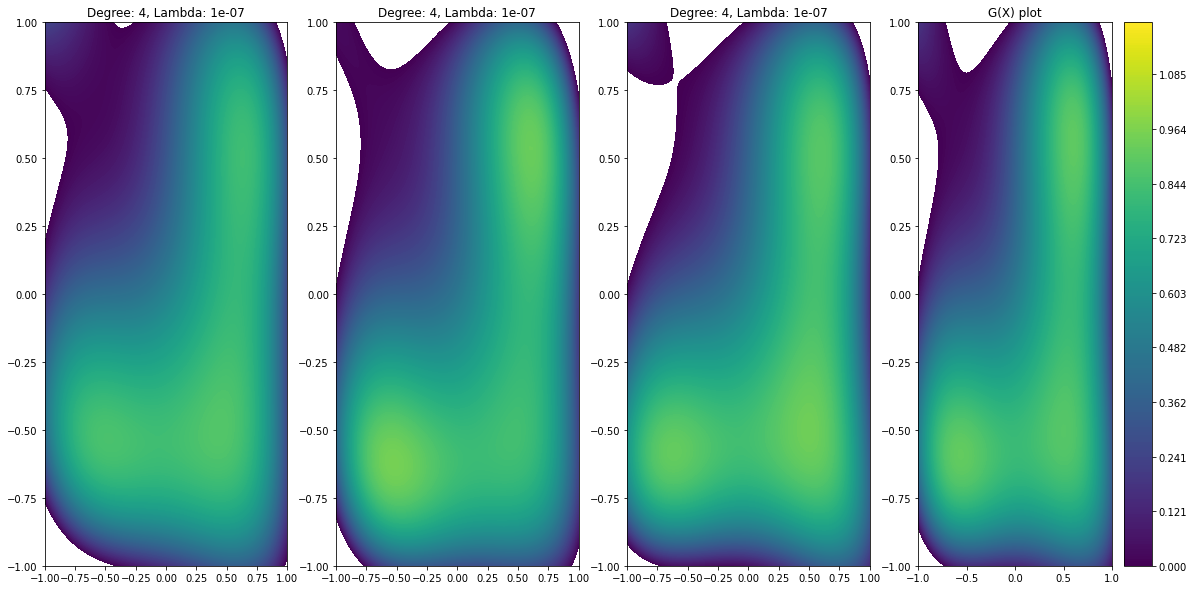

Degree= 4 lambda= 1e-07
Bias = 0.0075690939449544695
Variance = 0.007663717112910794
MSE = 0.015232811057865264


<Figure size 432x288 with 0 Axes>

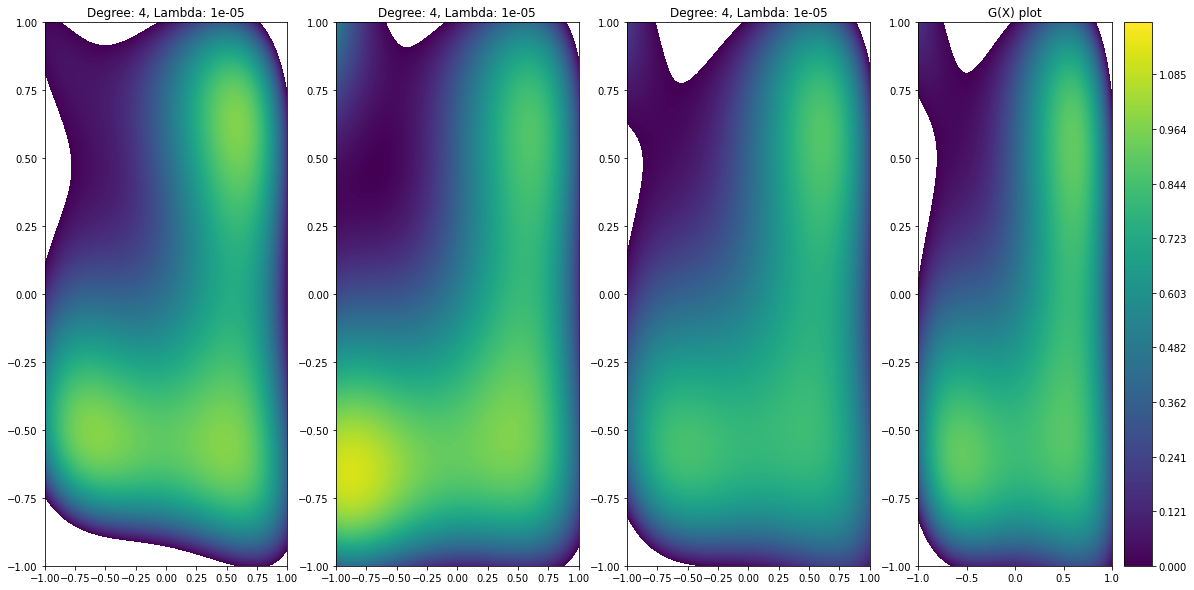

Degree= 4 lambda= 1e-05
Bias = 0.009512560999927392
Variance = 0.00972465802147667
MSE = 0.019237219021404062


<Figure size 432x288 with 0 Axes>

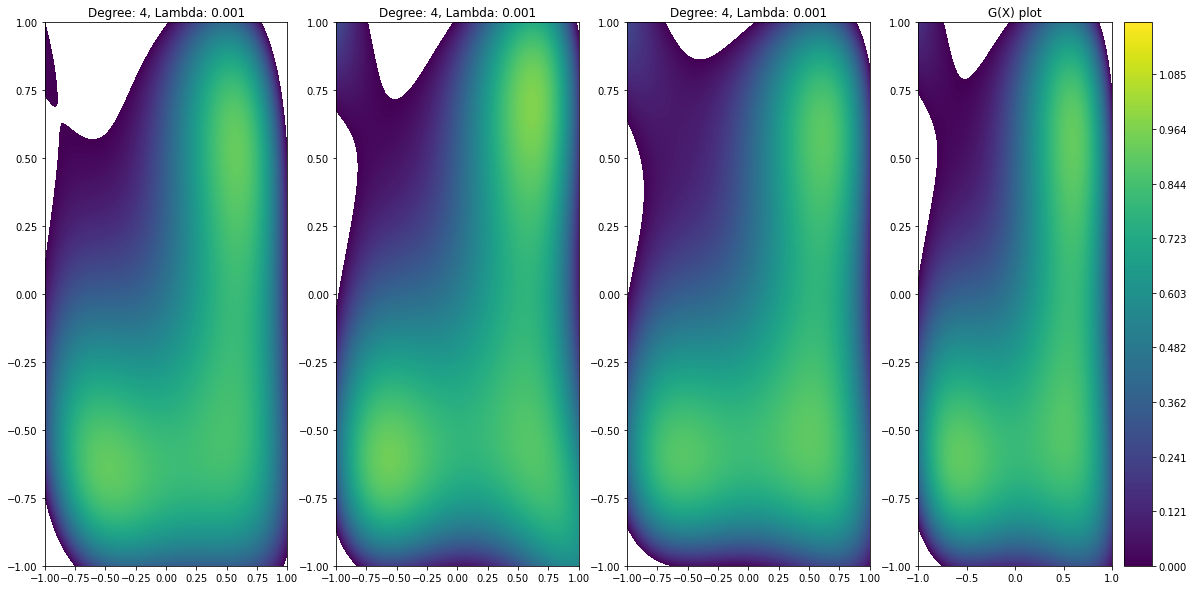

Degree= 4 lambda= 0.001
Bias = 0.007616616155982481
Variance = 0.009255613560352711
MSE = 0.01687222971633519


<Figure size 432x288 with 0 Axes>

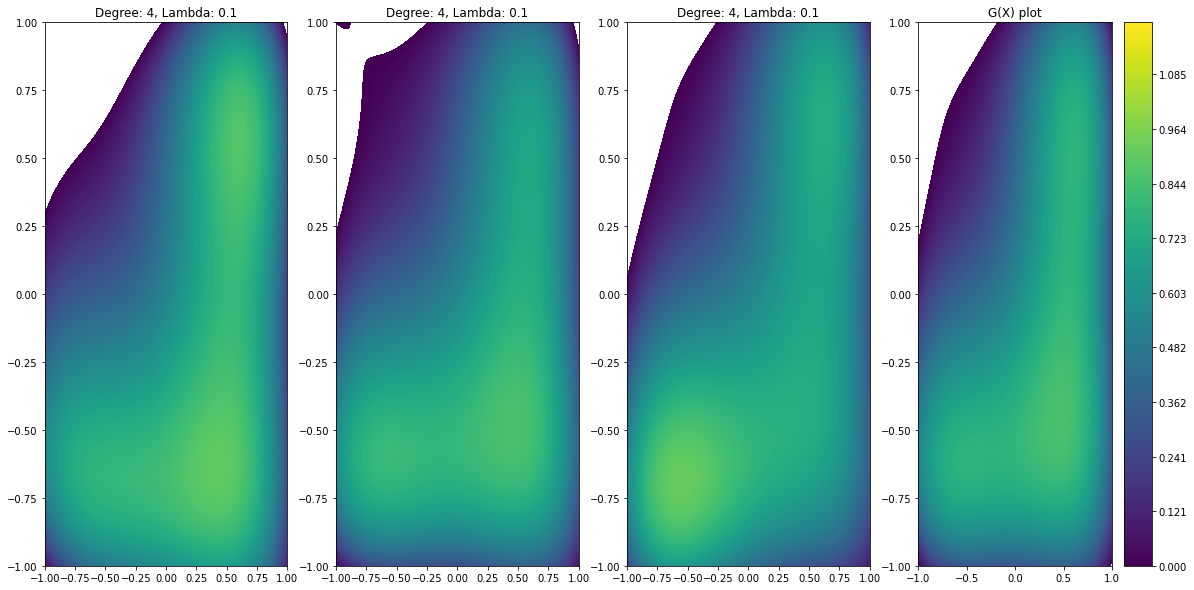

Degree= 4 lambda= 0.1
Bias = 0.00896665992368908
Variance = 0.0036491266231209506
MSE = 0.012615786546810032


<Figure size 432x288 with 0 Axes>

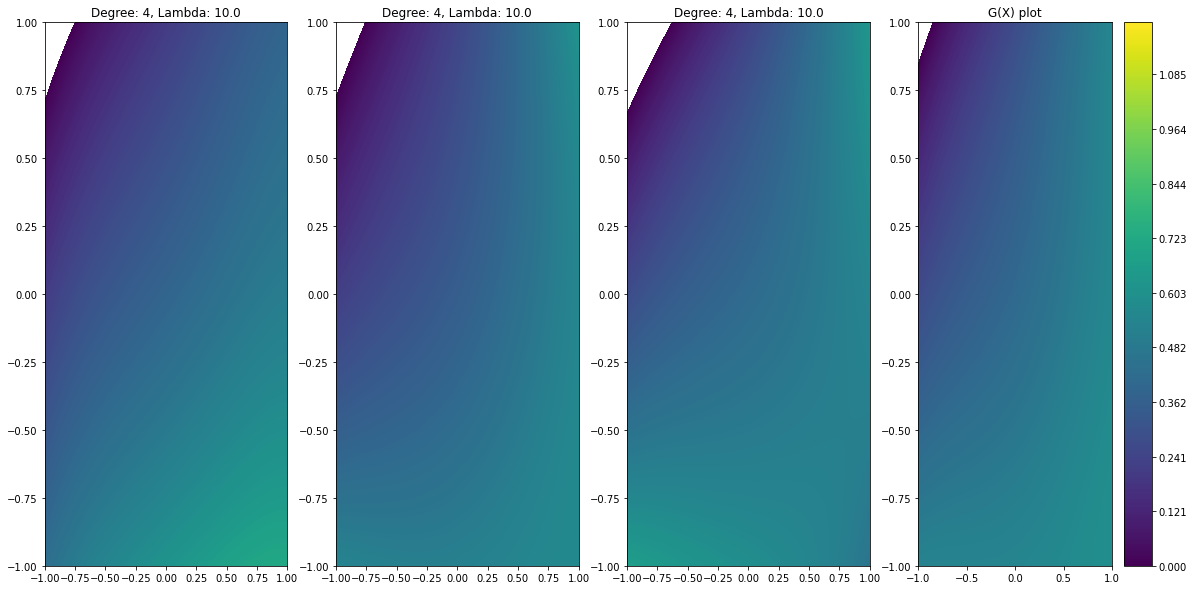

Degree= 4 lambda= 10.0
Bias = 0.05754950591432042
Variance = 0.002354821070470717
MSE = 0.05990432698479114


<Figure size 432x288 with 0 Axes>

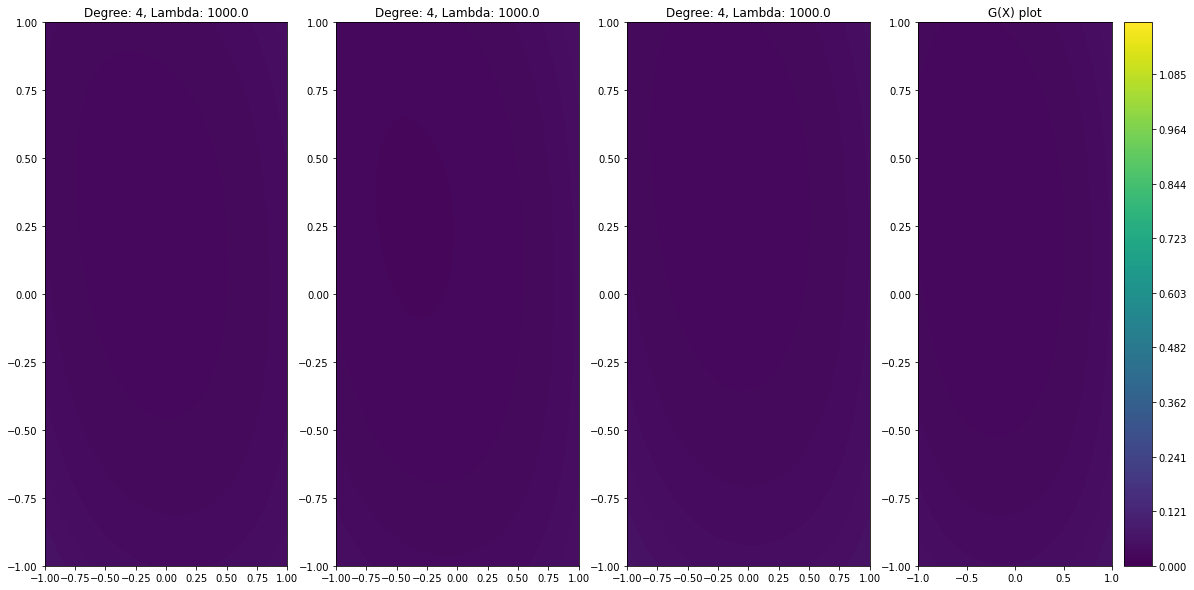

Degree= 4 lambda= 1000.0
Bias = 0.29671893441433367
Variance = 1.2204185428825634e-05
MSE = 0.29673113859976247


<Figure size 432x288 with 0 Axes>

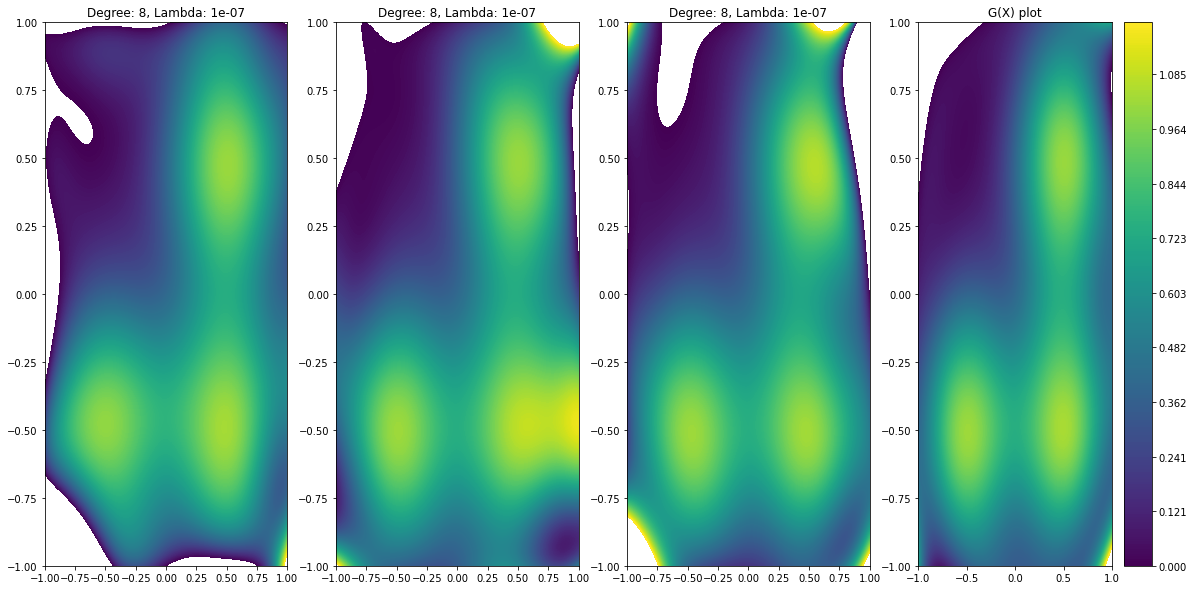

Degree= 8 lambda= 1e-07
Bias = 0.01003800795162427
Variance = 0.17438790099997634
MSE = 0.1844259089516006


<Figure size 432x288 with 0 Axes>

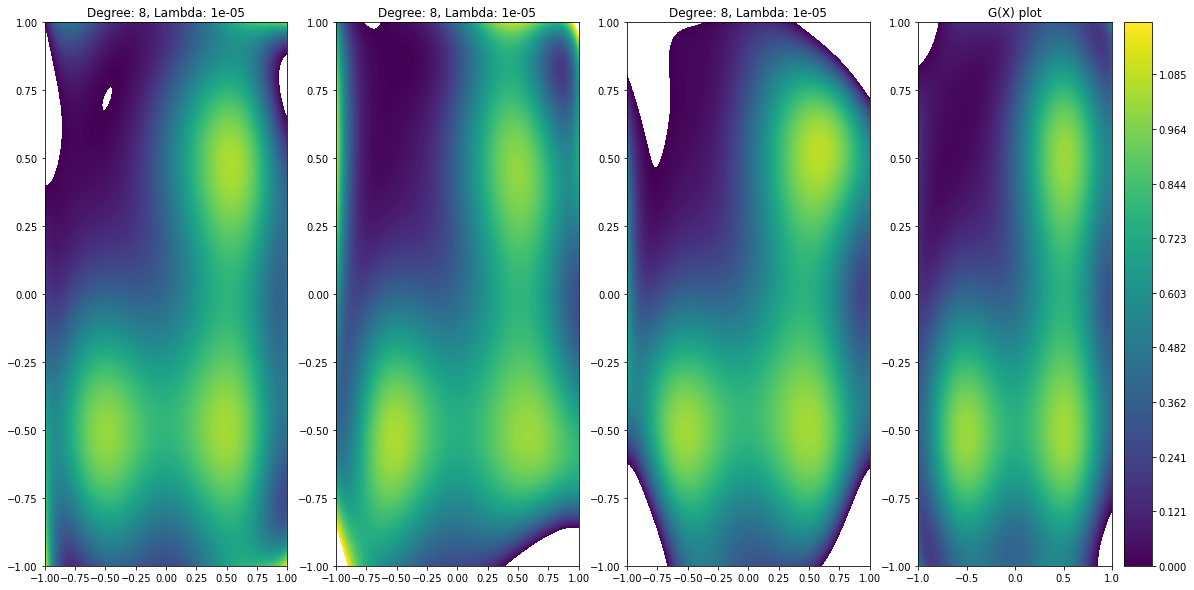

Degree= 8 lambda= 1e-05
Bias = 0.002527032292744731
Variance = 0.04963934729852957
MSE = 0.0521663795912743


<Figure size 432x288 with 0 Axes>

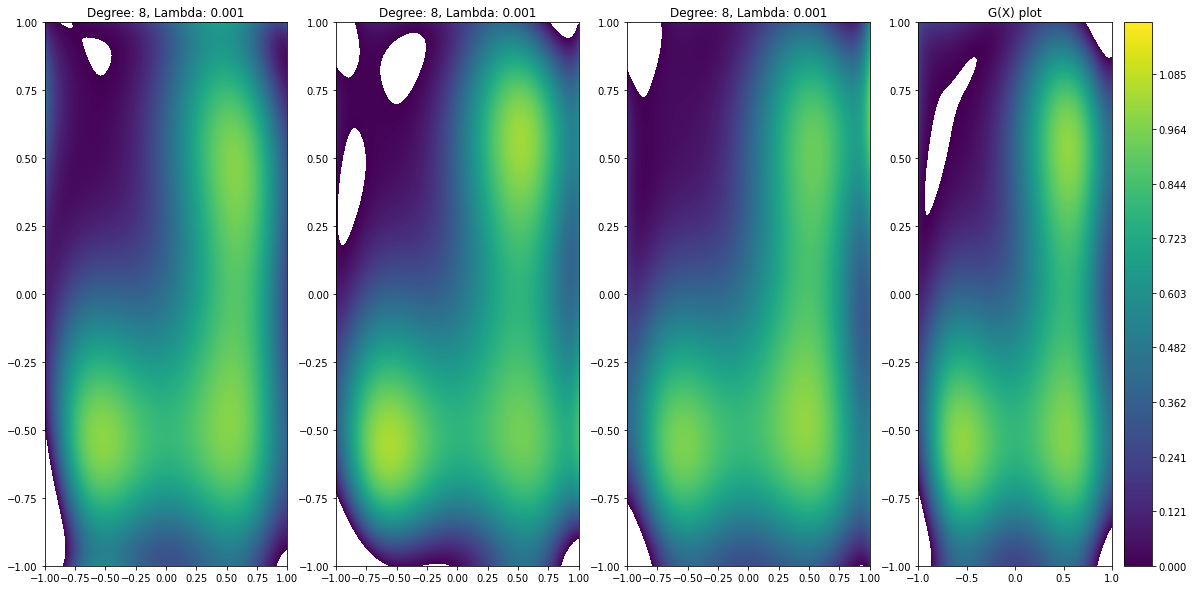

Degree= 8 lambda= 0.001
Bias = 0.004361673685386056
Variance = 0.01740765979638687
MSE = 0.021769333481772925


<Figure size 432x288 with 0 Axes>

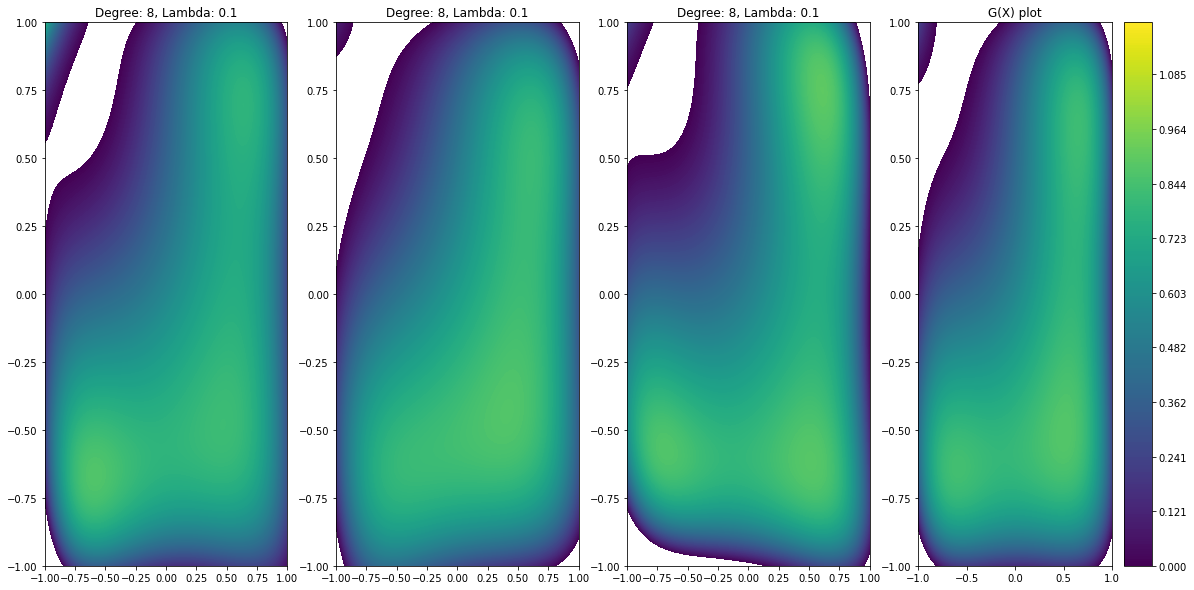

Degree= 8 lambda= 0.1
Bias = 0.009014461181498982
Variance = 0.006494491120403194
MSE = 0.015508952301902176


<Figure size 432x288 with 0 Axes>

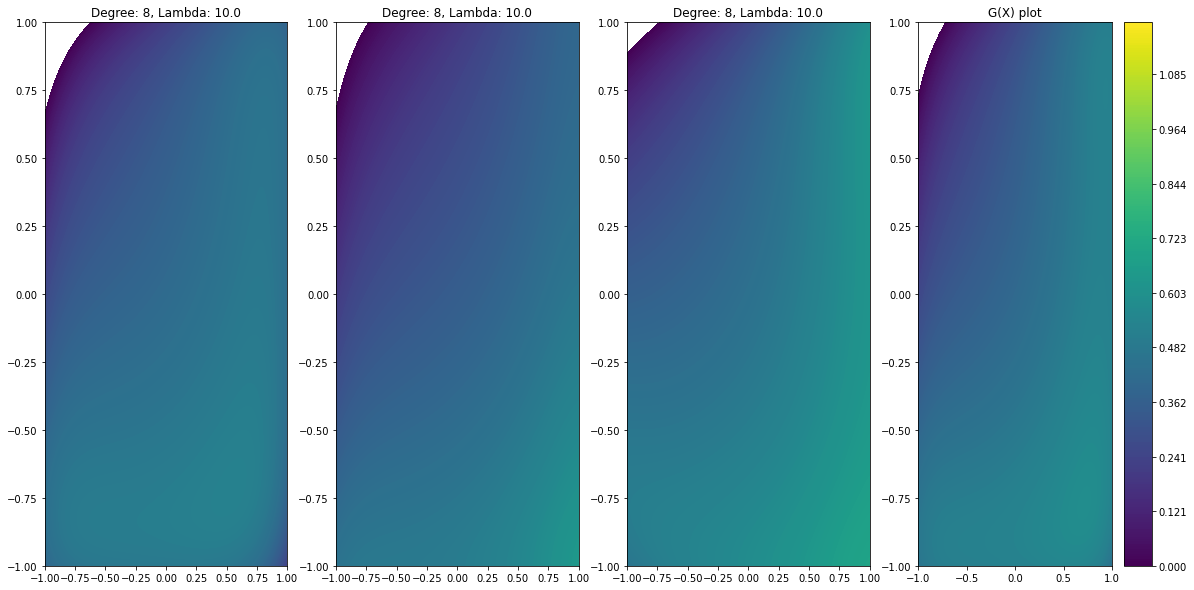

Degree= 8 lambda= 10.0
Bias = 0.057812118693857995
Variance = 0.002358766790870954
MSE = 0.060170885484728945


<Figure size 432x288 with 0 Axes>

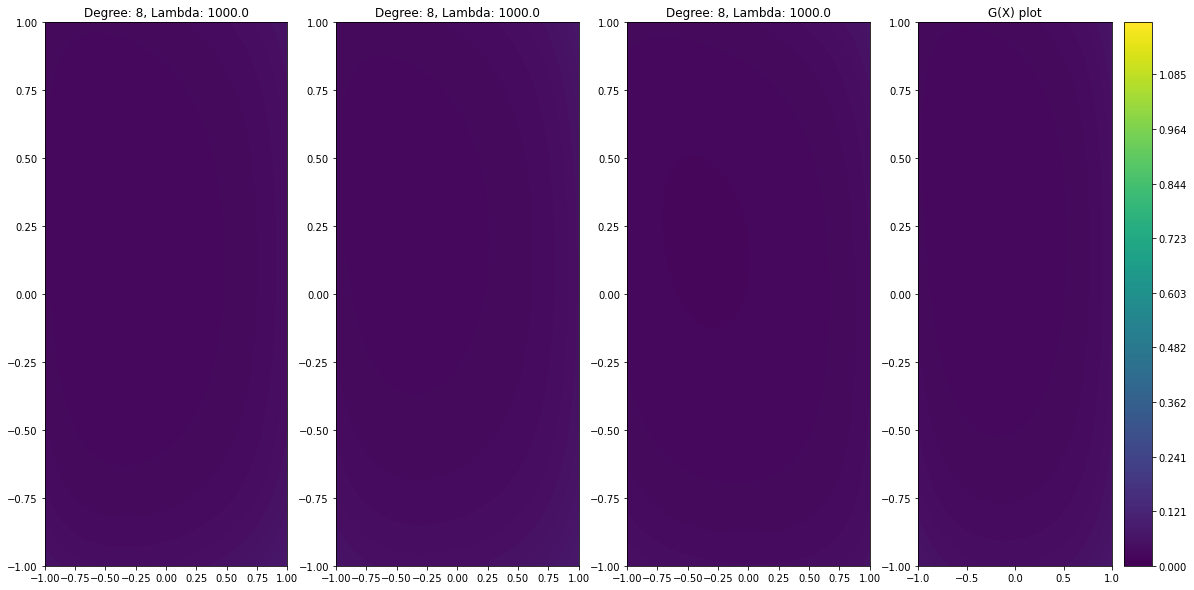

Degree= 8 lambda= 1000.0
Bias = 0.30781685380536233
Variance = 1.4328562681281874e-05
MSE = 0.30783118236804363


<Figure size 432x288 with 0 Axes>

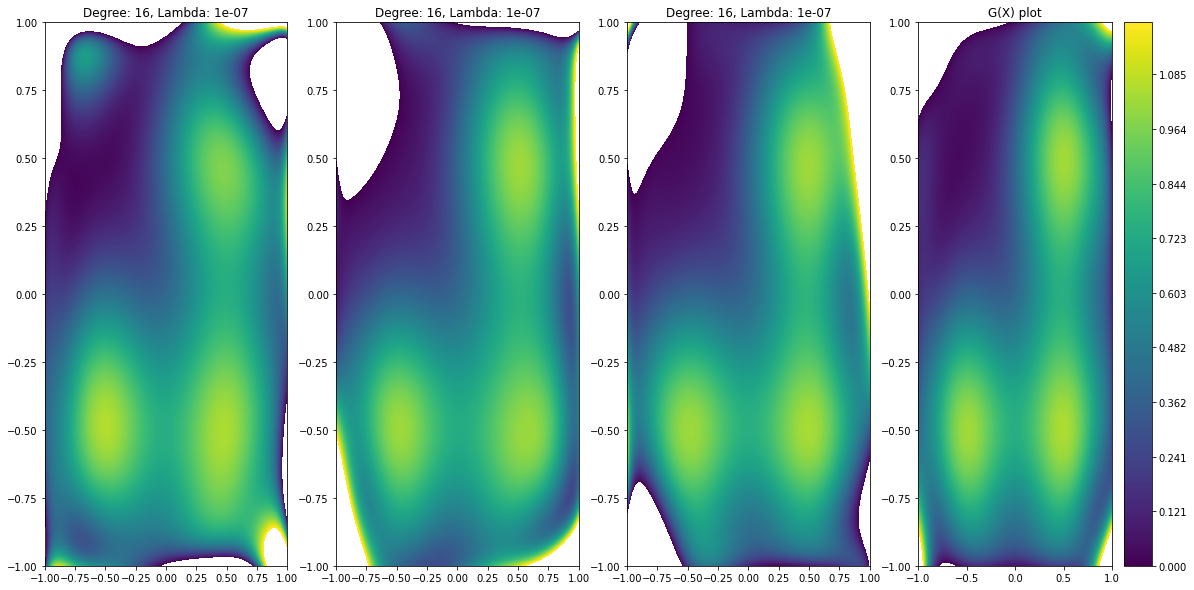

Degree= 16 lambda= 1e-07
Bias = 0.053597082874845076
Variance = 0.3920910640929564
MSE = 0.44568814696780146


<Figure size 432x288 with 0 Axes>

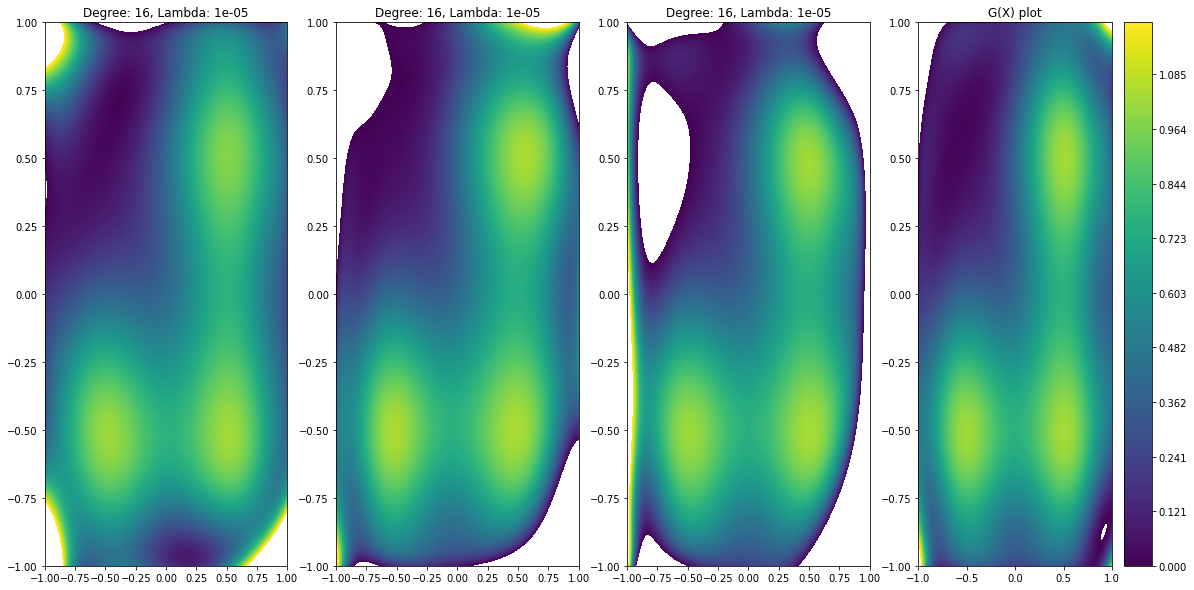

Degree= 16 lambda= 1e-05
Bias = 0.012196011004583444
Variance = 0.16830147806604095
MSE = 0.1804974890706244


<Figure size 432x288 with 0 Axes>

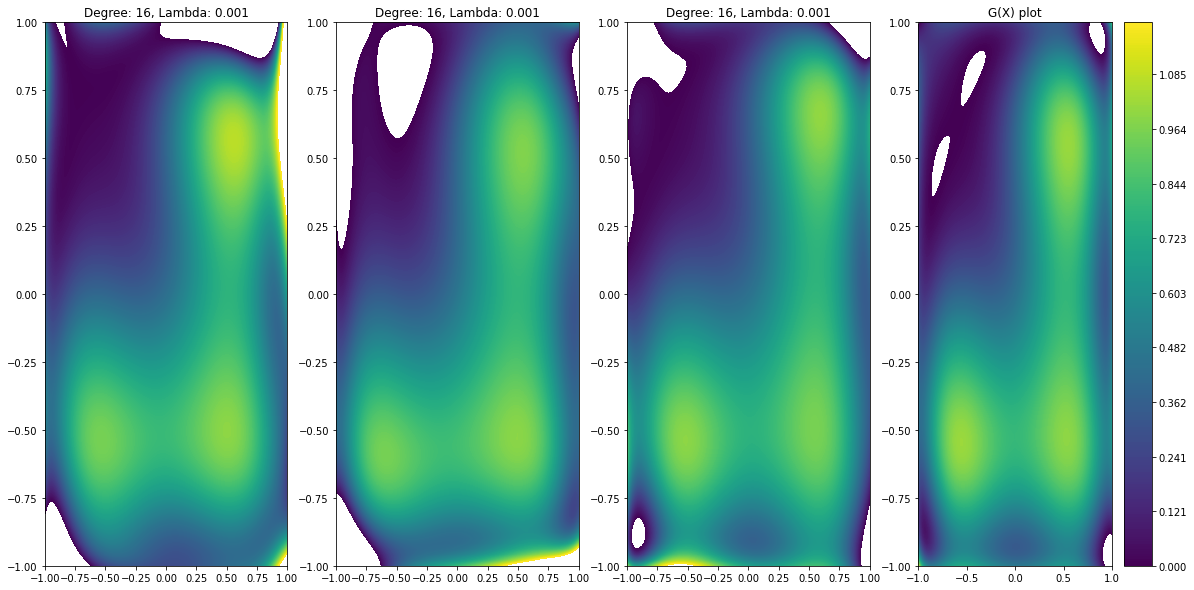

Degree= 16 lambda= 0.001
Bias = 0.00505580480795457
Variance = 0.051379393695096684
MSE = 0.05643519850305125


<Figure size 432x288 with 0 Axes>

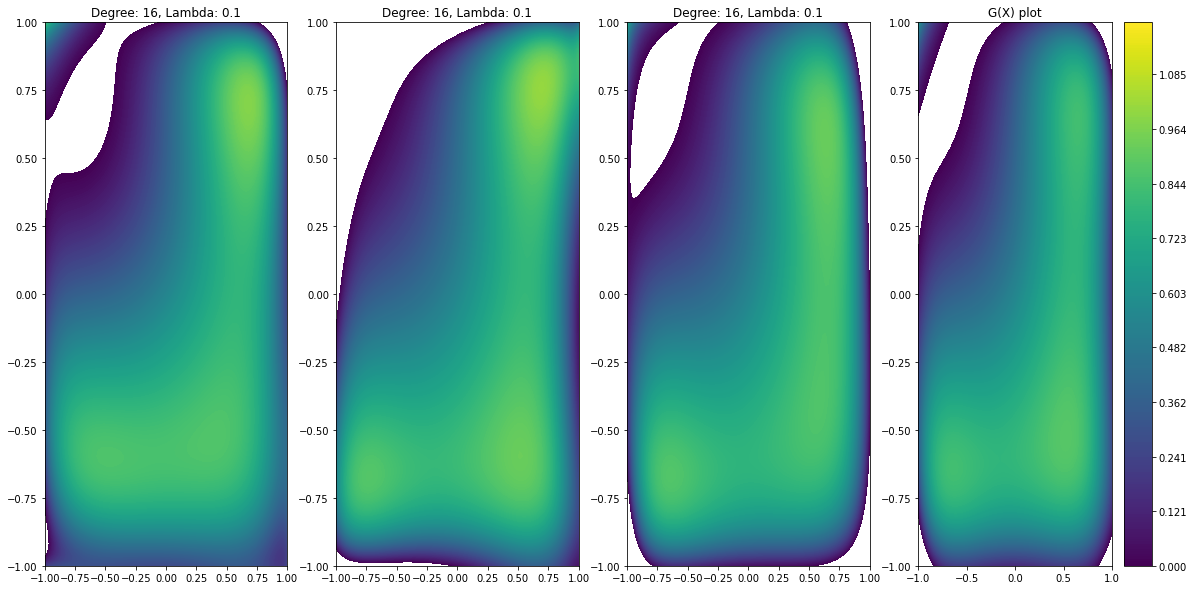

Degree= 16 lambda= 0.1
Bias = 0.011246701707401174
Variance = 0.010285124027963787
MSE = 0.02153182573536496


<Figure size 432x288 with 0 Axes>

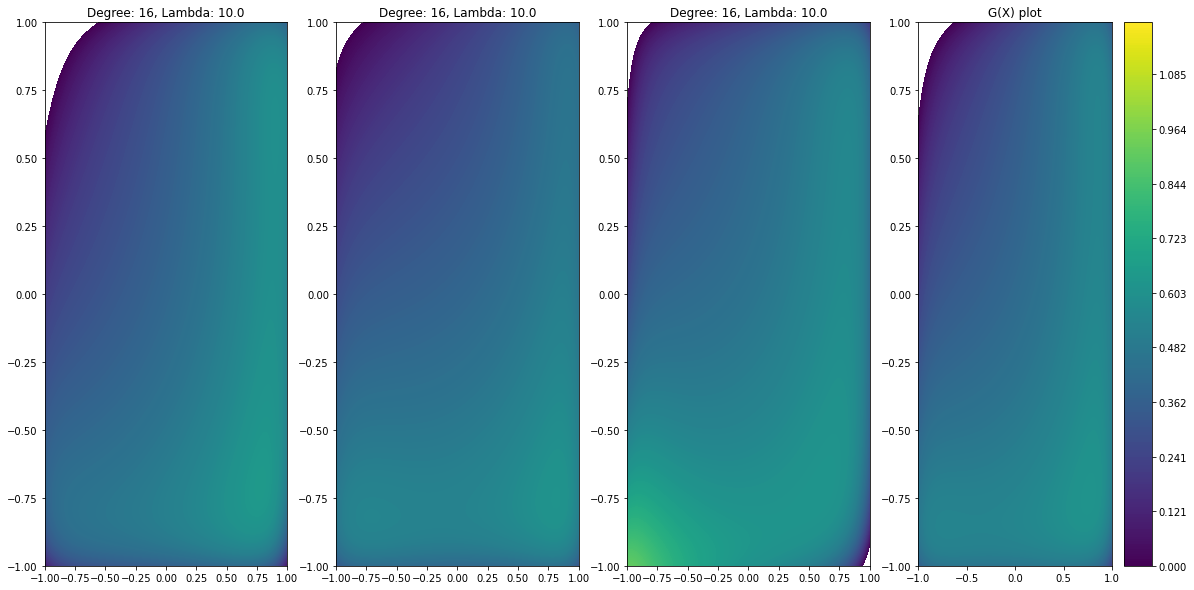

Degree= 16 lambda= 10.0
Bias = 0.05497037549440118
Variance = 0.002496043003229328
MSE = 0.05746641849763051


<Figure size 432x288 with 0 Axes>

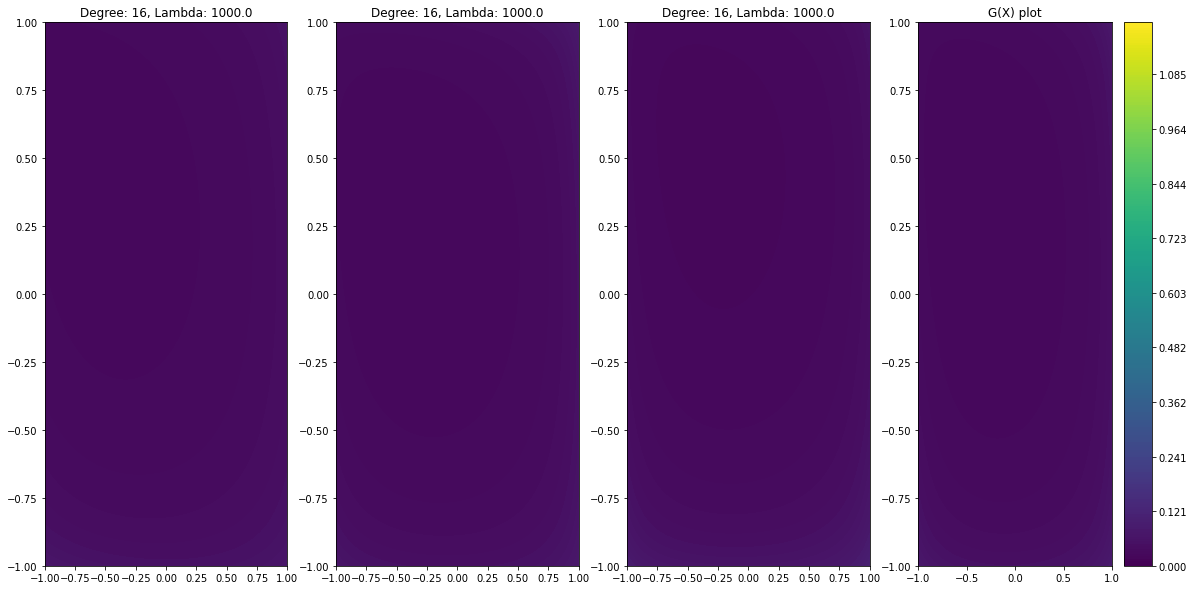

Degree= 16 lambda= 1000.0
Bias = 0.3030747496646673
Variance = 1.87672756975673e-05
MSE = 0.30309351694036485


In [ ]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    n = X_test.shape[0]
    Y_test_pred = np.zeros(n)
    
    for i in range(n):
        p=0
        for j in range(degree+1) :
            for k in range(j+1):
                Y_test_pred[i] += wt_vector[p]*(X_test[i][0]**(j-k))*(X_test[i][1]**k)
                p+=1
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Z = polynomial_regression_ridge_pred(np.c_[np.array(X.ravel()),np.array(Y.ravel())], wt_vector, degree).reshape(100,-1)
    print(X.shape,Y.shape,Z.shape)
    # Get Z using other functions
    
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2,20))
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n = X_train.shape[0]
    m = int((degree+1)*(degree+2)/2)
    X = np.zeros((n,m))
    for i in range (n) :
        p = 0
        for j in range (degree+1) :
            for k in range (j+1) :
                X[i][p] = (X_train[i][0]**(j-k))*X_train[i][1]**k
                p+=1
    XTX = np.dot(X.T,X)
    XTX_plus_lambdaI = XTX + reg_param*np.eye(m) 
    XTX_plus_lambdaI_inv = np.linalg.inv(XTX_plus_lambdaI)
    XTX_plus_lambdaI_dot_XT = np.dot(XTX_plus_lambdaI_inv,X.T)
    result = np.dot(XTX_plus_lambdaI_dot_XT,Y_train)
    return result
    
def y(x):
    a = np.array([0.5,0.5])
    b = np.array([-0.5,-0.5])
    c = np.array([0.5,-0.5])
    ret = np.exp(-4*pow(np.linalg.norm(x-a),2))  + np.exp(-4*pow(np.linalg.norm(x-b),2)) +  np.exp(-4*pow(np.linalg.norm(x-c),2)) 
    return ret
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    d = int((degree+1)*(degree+2)/2) 
    weight = np.zeros((100,d))
    data = np.zeros((100,num_training_samples,2))
    for i in range (100) :
        x1axis = np.linspace(-1, 1, 100) 
        x2axis = np.linspace(-1, 1, 100)
        x1_sample = np.random.choice(x1axis,num_training_samples)
        x2_sample = np.random.choice(x2axis,num_training_samples)
        data[i] = np.array([*zip(x1_sample,x2_sample)])
        
    for i in range(100):
        xtrain = data[i]
        ytrain = np.apply_along_axis(y, 1, xtrain) ## vectorizing function to apply to array at once
        weight[i] = polynomial_regression_ridge_train(xtrain,ytrain, degree, reg_param)
    g_x = np.mean(weight , axis=0) ##E_s[f_s]
    
    ## Plotting of data
    fig,axes =  plt.subplots(1,4,figsize = (20,10))
    i = 0
    while i<3:
        X,Y = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
        Z = polynomial_regression_ridge_pred(np.c_[np.array(X.ravel()),np.array(Y.ravel())],weight[i],degree).reshape(100,-1)
        h = axes[i].contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 220))
        axes[i].set_title("Degree: {}, Lambda: {}".format(degree,reg_param))
        i+=1
    
    X,Y = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
    Z = polynomial_regression_ridge_pred(np.c_[np.array(X.ravel()),np.array(Y.ravel())],g_x,degree).reshape(100,-1)
    h = axes[3].contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 220))
    axes[3].set_title("G(X) plot")
    fig.colorbar(h)    
    plt.show()
    
    #### Calculating bias, Variance
    U = np.c_[(X.ravel()),(Y.ravel())]
    S = U[np.random.choice(U.shape[0],1000, replace=False)]
    ### variance is the mean of square of difference of f(x) and average f(x) -> g(x)
    ### Bias is the mean of square of difference of f(x) and true function 
    var = np.zeros(100)
    b = np.zeros(100)
    for i in range(100):
        fx = polynomial_regression_ridge_pred(S, weight[i], degree)
        gx = polynomial_regression_ridge_pred(S, g_x, degree)
        yx = np.vectorize(y)(S)
        yx = np.apply_along_axis(y, 1, S)
        var[i] = np.mean((fx-gx)**2)
        b[i] = np.mean((gx-yx)**2)
    variance = np.mean(var)
    bias = np.mean(b)
    mse = bias + variance
    return bias,variance,mse

for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [ ]:
# Cell type: convenience

** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

<font face='Courier New' size = 3 color = "tomato"><b>
Bias Table :

 Degree | 1e-7                | 1e-5                 | 1e-3                | 1e-1                 | 1e1                  | 1e3                  
-------------- | --------------------- | ---------------------- | --------------------- | ---------------------- | ---------------------- | ----------------------
 1            | 0.0555257860375269 | 0.05548930739898238 | 0.05471122603258932 | 0.055677321302574176  | 0.030795288411572187 | 0.322745761245463  
 2            | 0.03641737727952337 | 0.035385333733263004  | 0.036430733697998645 | 0.03488675210027889   | 0.061171635696340376 | 0.29482616841313386
 4            | 0.008955004812369488 | 0.007698221549336874  | 0.00713162286083651 | 0.00881260097507486 | 0.06208538239304951 | 0.31370384749378544 
 8            | 0.010741151800721048 | 0.002445039178169052  | 0.003727825795172976  | 0.009861147601146328  | 0.05803576187829527 | 0.2938932031790877 
 16           | 0.016642290445966677 | 0.006514331069368044  | 0.005193253352509934 | 0.011559776740744787 | 0.0527670866360769 | 0.2905027189138155           
 
   
 
Variance Table :
 
 Degree| 1e-7                  | 1e-5                  | 1e-3                  | 1e-1                  | 1e1                    | 1e3                    
  -------------- | ----------------------- | ----------------------- | ----------------------- | ----------------------- | ------------------------ | ------------------------
 1            | 0.00367192722076624  | 0.0036989915191767376 | 0.0037007422488010695  | 0.004406726580319426 | 0.00048137925968087363 | 0.0015744063451958918 |
 2            | 0.005626279917395433 | 0.005633867978251753  | 0.005034087457310271 | 0.004810700863877169 | 0.0018005381632383338  | 8.192293797089798e-06  |
 4            | 0.005001065345382773  | 0.008128495648686807  | 0.007474827706222914  | 0.0033799220393603 | 0.002141096436893521  | 1.8449692131366973e-06 |
 8            | 0.23678698776359158   | 0.01594937176705735   | 0.05902618372281851   | 0.007385987416473406  | 0.0022955674394268617 | 1.4838042512955066e-05 |
 16           | 0.31653340174483213     | 0.16552793114358655    | 0.06029369742329341   | 0.012788301654608368  | 0.0024975017059694076  | 1.8517638999741056e-05 |
 

- From the tables, we notice that as the degree of the polynomial increases, the bias decreases and the variance increases. Thus, as complexity increases it can be said that the bias decreases and variance increases
- For a polynomial of given degree, as regularization paramater increases,bias decreases and then increases
- In case of bias, for higher degrees, minimum bias occurs with lower regularisation parameters than lower degree polynomials
- In case of variance, we can approximately say that for a fixed degree, as regularization parameter increases, variance increases and then decreases.
- Further we can say that when regularization parameter is small (<=10) magnitude of bias as well as variance is small as compared to a large lambda (~1000)

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




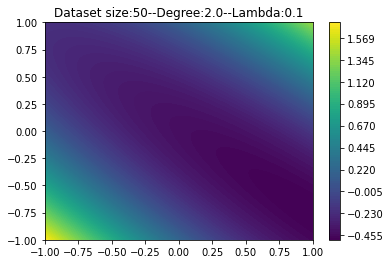

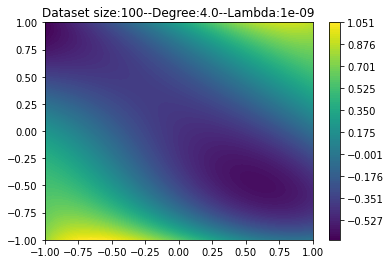

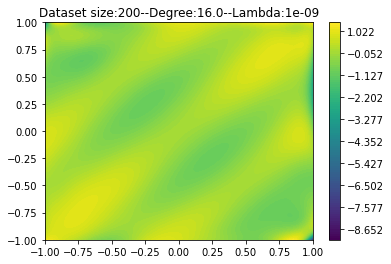

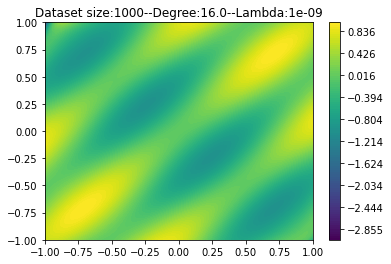

In [ ]:
# Cell type : CodeWrite 
data =   np.load('../../Data/dataset4_1.npz')
xtrain_total = data['arr_0']
ytrain_total = data['arr_1']
xtest = data['arr_2']
ytest = data['arr_3']
train_mse = np.zeros((4,5,6))
test_mse = np.zeros((4,5,6))
wcap_list = np.empty((4,5,6),dtype=object)


def choose_data(size,totalx=xtrain_total,totaly=ytrain_total):
    x = totalx[:size]
    y = totaly[:size]
    return x,y
def poly_reg_mse(y,ypred,reg,wcap):
    mse = 0.5*np.sum((y-ypred)**2)
    reg_mse = reg/2*np.linalg.norm(wcap)
    return mse +reg_mse

###4 training sets, 5 degrees, 6 lambdas
sizes = [50, 100, 200,1000]
degrees = [1,2,4,8,16]
lambdas = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
### filling up train and test error tables
for i,size in enumerate(sizes):
    xtrain,ytrain = choose_data(size)
    for j,degree in enumerate(degrees):
        for k,reg in enumerate(lambdas):
            wcap = polynomial_regression_ridge_train(xtrain, ytrain, degree, reg)
            wcap_list[i,j,k] = wcap
            
            ytrain_pred = polynomial_regression_ridge_pred(xtrain, wcap, degree)
            ytest_pred = polynomial_regression_ridge_pred(xtest, wcap, degree)
            
            train_mse[i,j,k] = poly_reg_mse(ytrain,ytrain_pred,reg,wcap)
            test_mse[i,j,k] = poly_reg_mse(ytest,ytest_pred,reg,wcap)
            
### for each training set size, computing best degree and lambda and the best weight vectors
best_hyperparams = np.zeros((5,2))
best_wcaps = np.empty(5,dtype=object)
for i in range(len(sizes)):
    j,k = np.where(test_mse[i] == np.amin(test_mse[i]))
    j,k=j.item(),k.item()
    best_hyperparams[i,:] = degrees[j],lambdas[k]
    best_wcaps[i] = wcap_list[i,j,k]    
for i in range(len(sizes)):
    X,Y = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
    Z = polynomial_regression_ridge_pred(np.c_[np.array(X.ravel()),np.array(Y.ravel())],best_wcaps[i],int(best_hyperparams[i,0])).reshape(100,-1)
#     h = plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 220))
    h = plt.contourf(X, Y, Z, np.linspace(Z.min(), Z.max(), 100))
    plt.title("Dataset size:{}--Degree:{}--Lambda:{}".format(sizes[i],best_hyperparams[i,0],best_hyperparams[i,1]))
    plt.colorbar(h)    
    plt.show()
#     visualise_polynomial_2d(best_wcaps[i], best_hyperparams[i,0], title="Dataset:{}--Degree:{}--Lambda:{}".format(i,best_hyperparams[i,0],best_hyperparams[i,1]))

** Cell type : TextWrite **   
<font face='Courier New' size = 3 color = "deeppink">  
<b>SAMPLE SIZE = 50  
Train MSE     
    
Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---  
1|6.25957810e+00 |6.25957812e+00| 6.25957988e+00| 6.25975568e+00 |6.27727791e+00|7.58321882e+00
2|3.35278995e+00| 3.35279002e+00| 3.35279655e+00| 3.35345020e+00| 3.41936063e+00 |6.98007296e+00
4|2.55045786e+00| 2.55045799e+00| 2.55047083e+00| 2.55177180e+00| 2.69401629e+00| 6.63236435e+00
8|3.31863002e-03| 5.00691181e-03| 2.70072264e-01| 1.05128032e+00|2.17397007e+00| 6.29975630e+00
16|6.19266184e-07| 2.45425869e-04| 3.36390209e-02| 7.87208145e-01| 1.87872777e+00| 6.00987676e+00

Test MSE

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---  
1|1.50633409e+03|1.50633409e+03|1.50633387e+03|1.50631266e+03|1.50420879e+03|1.39293924e+03  
2|7.89499943e+02|7.89499936e+02|7.89499265e+02|7.89432250e+02|7.83740330e+02|1.04316121e+03
4|7.86669830e+02|7.86669780e+02|7.86664764e+02|7.86215191e+02|8.09223291e+02|9.84959394e+02
8|1.18845029e+06|8.62509311e+05|9.29712706e+04|4.95126201e+03|8.25903004e+02|9.71812701e+02
16|1.25261146e+06|1.16012414e+06|3.33488422e+05|1.16865510e+04|1.01993550e+03|9.82546164e+02

SAMPLE SIZE = 100

Train MSE  

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---    
1|1.29045507e+01|1.29045507e+01|1.29045517e+01|1.29046504e+01|1.29145078e+01|1.37287913e+01
2|6.54753138e+00|6.54753143e+00|6.54753730e+00|6.54812368e+00|6.60687356e+00|1.11471213e+01
4|5.65133189e+00|5.65133200e+00|5.65134280e+00|5.65242544e+00|5.77336191e+00|1.04436878e+01
8|2.07939638e+00|2.07940282e+00|2.08455442e+00|2.91436251e+00|4.79075461e+00|1.00149927e+01
16|3.87711250e-04|2.42415664e-02|3.78315863e-01|2.10141502e+00|4.33965553e+00|9.74630927e+00  

Test MSE  

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---      
1|1365.74318902|1365.74318871|1365.74315709|1365.73999488|1365.42515345|1343.89949638
2|766.04965591|766.04965441|766.04950425|766.03449816|764.63738035|881.44611843
4|713.87875934|713.8787752|713.88036136|714.03928056|730.19295244|847.72597534
8|3564.58175355|3556.59814355|2903.79623052|1018.20525428|813.28356042|858.61289189
16|270400.2086974|58852.09996283|117082.94536007|2089.25749779|941.95053175|873.56896192

SAMPLE SIZE = 200
Train MSE  

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---      
1|2.46535074e+01|2.46535075e+01|2.46535082e+01|2.46535859e+01|2.46613477e+01|2.53733385e+01
2|1.33665326e+01|1.33665326e+01|1.33665381e+01|1.33670894e+01|1.34222471e+01|1.83974325e+01
4|1.13338156e+01|1.13338157e+01|1.13338285e+01|1.13351070e+01|1.14772156e+01|1.77256582e+01
8|6.17373225e+00|6.17373462e+00|6.17404662e+00|6.41096658e+00|9.76616584e+00|1.74101790e+01
16|2.88379072e-03|1.08608760e-01|1.13445263e+00|4.46865863e+00|8.55645320e+00|1.68601657e+01

Test MSE

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---      
1|1338.31525164|1338.31525156|1338.31524374|1338.31446139|1338.23639368|1331.83656789
2|728.90325384|728.90325375|728.90324446|728.90231717|728.82779641|797.05367321
4|655.85484607|655.8548428|655.85451576|655.82201703|654.27089882|788.70679509
8|686.81497335|686.79589502|684.91048318|590.92895838|570.02424531|785.54678714
16|185.75131213|418.55112922|854.03518548|434.54082677|556.27666818|764.70396886

SAMPLE SIZE = 1000

Train MSE

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---      
1|1.20364109e+02|1.20364109e+02|1.20364110e+02|1.20364137e+02|1.20366858e+02|1.20634622e+02
2|6.94120513e+01|6.94120513e+01|6.94120564e+01|6.94125638e+01|6.94633059e+01|7.45023321e+01
4|6.25086211e+01|6.25086212e+01|6.25086318e+01|6.25096919e+01|6.26177465e+01|7.20702437e+01
8|3.83714268e+01|3.83714287e+01|3.83716267e+01|3.84409548e+01|4.78404576e+01|6.96728266e+01
16|1.27470594e-02|2.22705596e-01|3.27011986e+00|1.92552016e+01|4.29354374e+01|6.66848926e+01

Test MSE   

Degree|1e-9| 1e-7| 1e-5| 1e-3| 1e-1| 1e1  
---|---|---|---|---|---|---      
1|1312.67325153|1312.67325154|1312.67325178|1312.67327639|1312.67573668|1312.9217837|
2|712.14659319|712.1465933|712.14660464|712.14773845|712.26157241|727.23757607
4|635.39814183|635.39814272|635.39823167|635.40712901|636.31566329|709.66717591
8|424.06367938|424.06306104|424.00145034|419.58402393|489.53490174|680.39833475
16|5.98873127|7.45046862|54.78930931|248.33816144|454.1261733|644.94571081

- For a given sample size and lambda, as degree of fitting polynomial increases, train MSE decreases but test MSE May or may not decrease.
- As sample size increases, higher degrees start to perform better as compared to lower degrees, as can be seen from the best plots. 
- Further, from the best performing plots, we can see that on datasets of larger size, smaller lambda does better. For dataset size of 50, lambda = 0.1 does best, however for all other larger sample sizes, 1e-9 performs the best which tells us that as datasets get bigger, for a moderately complex function, it becomes difficult to overfit and hence much contribution from regularization is not required to prevent overfitting. 

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.












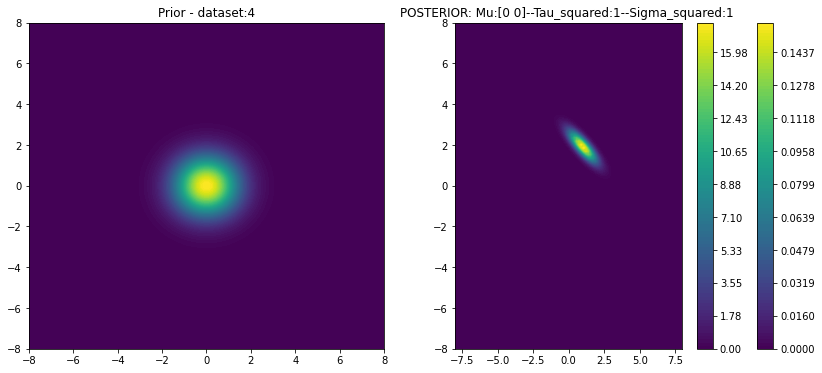

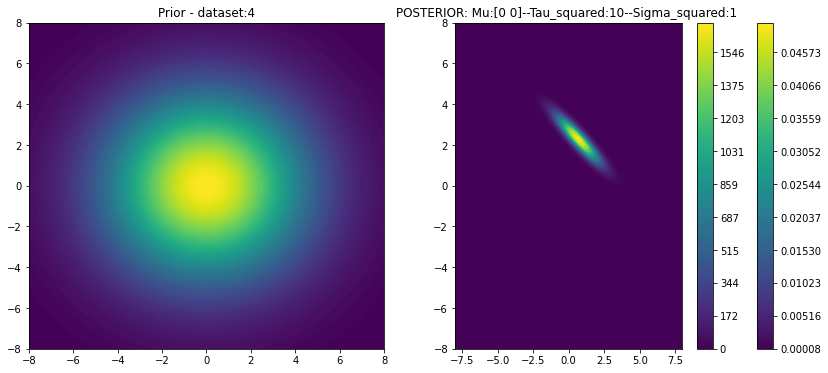

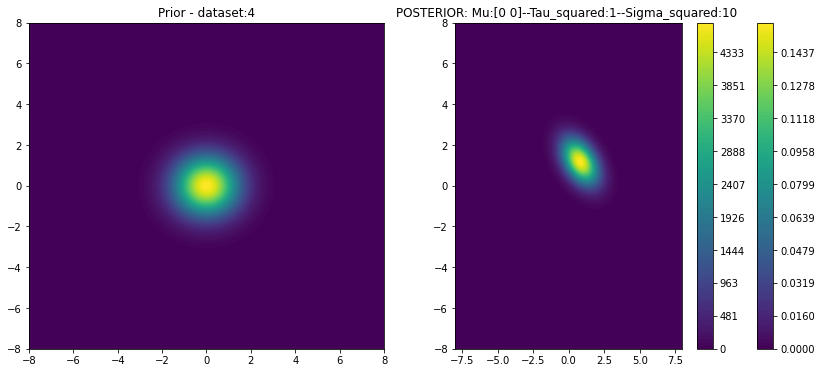

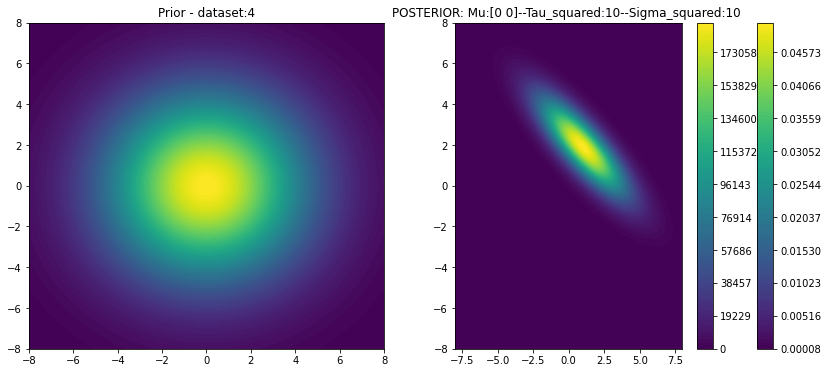

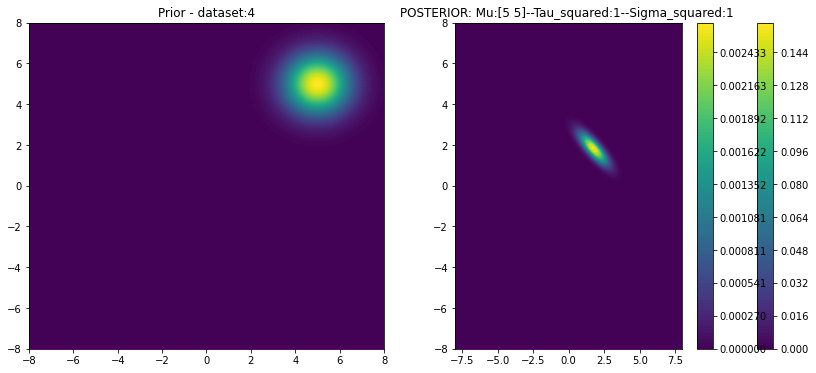

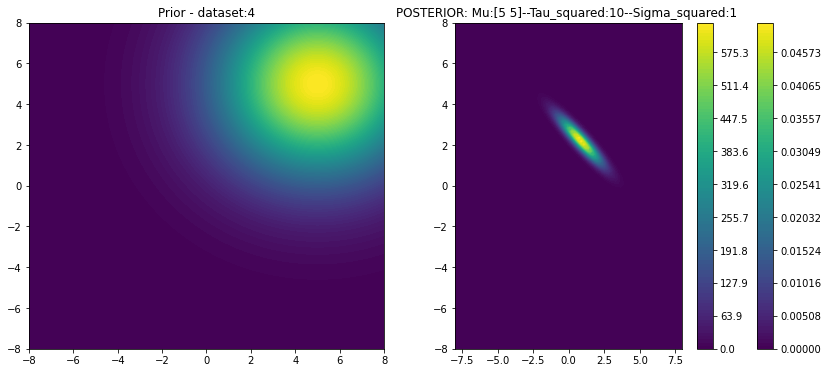

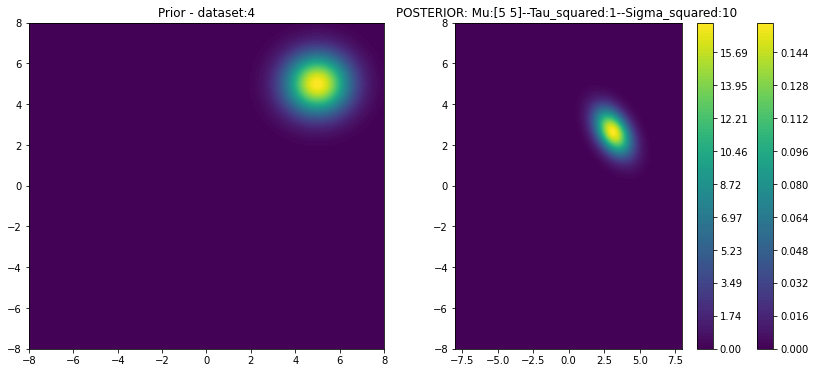

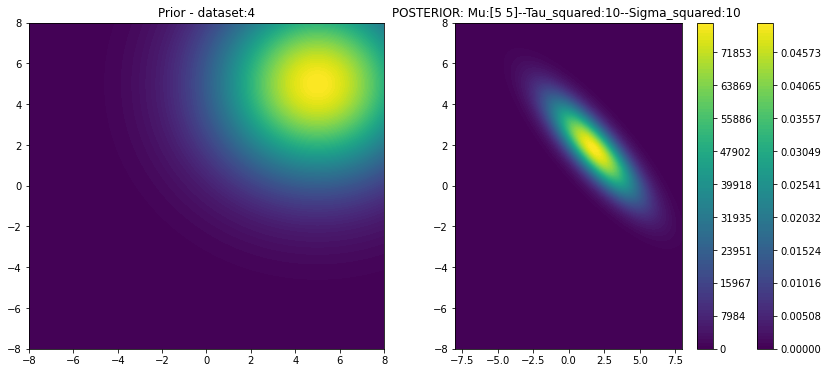

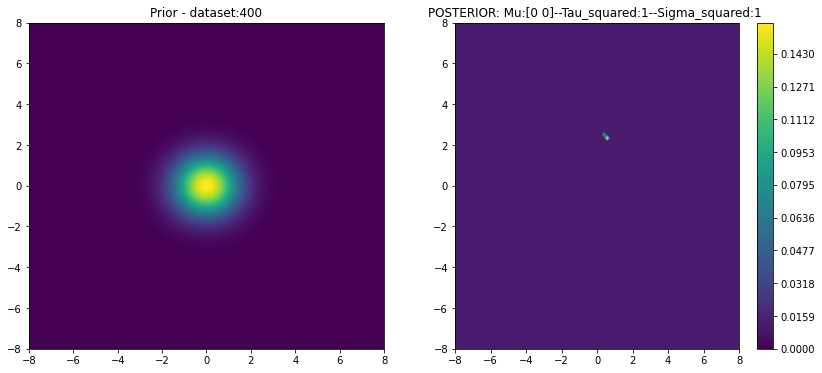

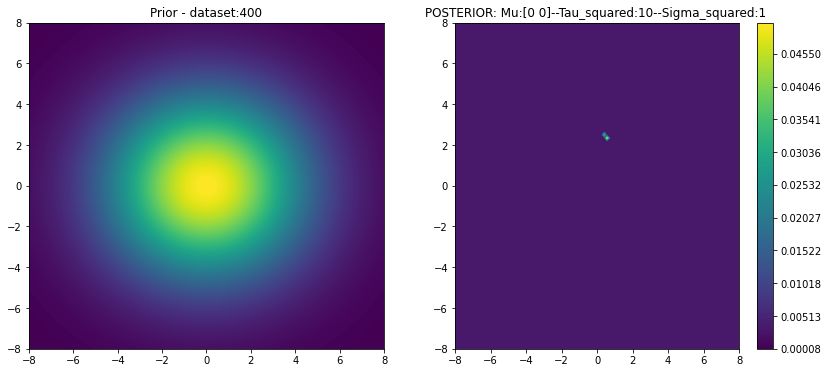

/home/shan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/home/shan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/home/shan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1211: RuntimeWarning: overflow encountered in add
  self.layers = 0.5 * (self._levels[:-1] + self._levels[1:])


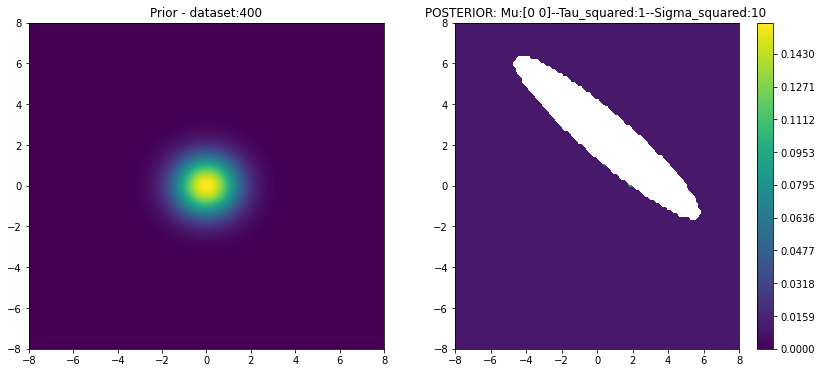

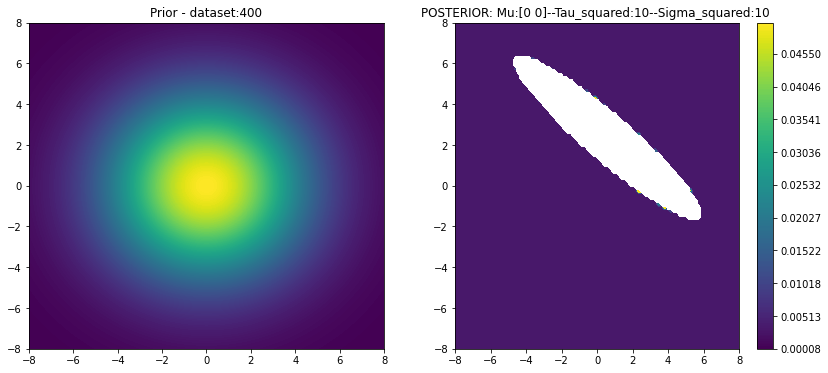

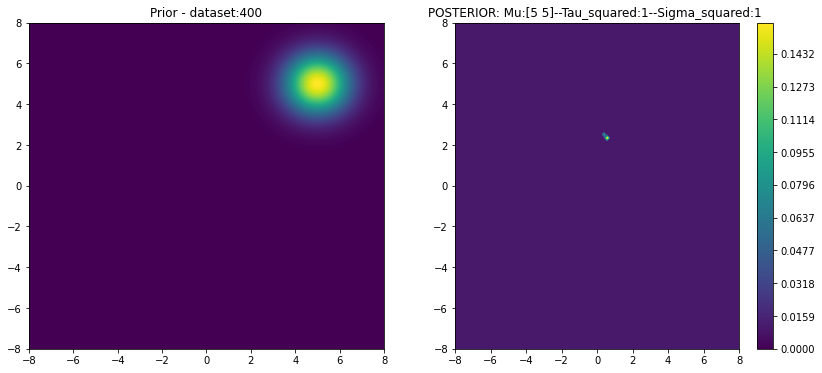

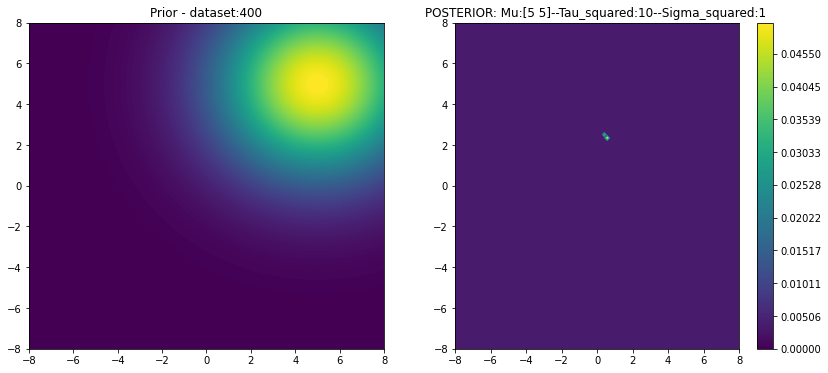

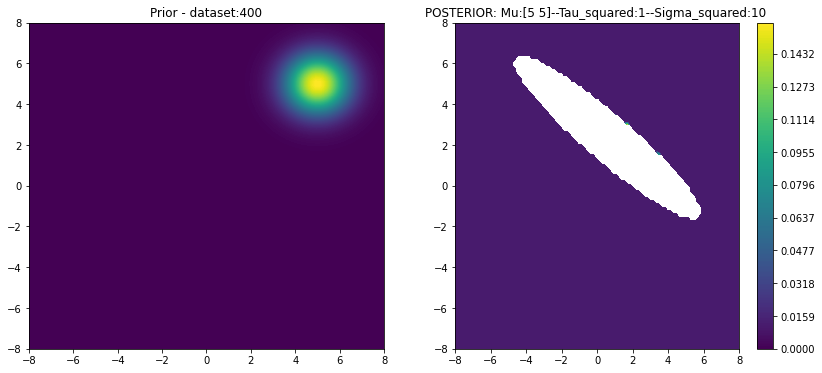

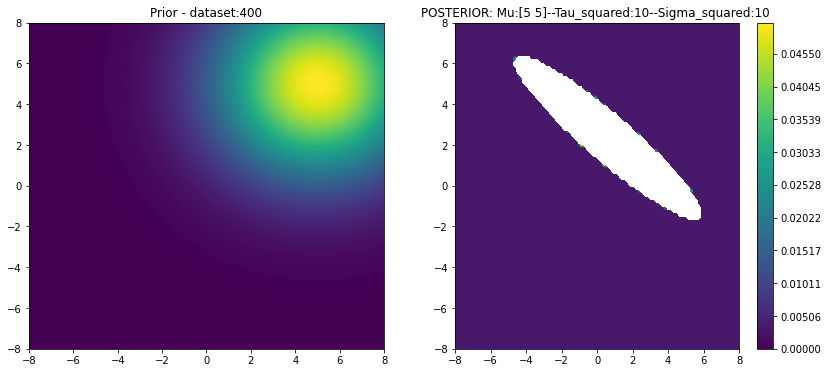

In [ ]:
# Cell type : CodeWrite 
# def posterior(xtrain,ytrain,mu,tau_square,sigma_square):
#     cov_inv = (1/tau_square)*np.eye(xtrain.shape[1])
#     cov_n_inv = cov_inv + (1/sigma_square)*np.linalg.inv(np.matmul(xtrain.T,xtrain))
#     cov_n = np.linalg.inv(cov_n_inv)
    
#     ###calculating mu_n
#     xTy = (1/sigma_squared)*np.matmul(xtrain.T,ytrain)
#     cov_inv_mu = np.matmul(cov_inv,mu.T)
#     mu_n = np.matmul(cov_n, cov_inv_mu + xTy)
#     return mu_n,cov_n

def normal_dist(x,mu,tau_squared):
    cov = tau_squared*np.eye(2)
    a = 2*np.pi*tau_squared**0.5 
    sigma_inv = (1/tau_squared)*np.eye(2)
    mat1 = np.matmul(sigma_inv,(x-mu).T)
    ins = -0.5*np.matmul((x-mu),mat1)
    return (1/a)*np.exp(ins)

##plotting prior distribution


def dist_w(w,xtrain,ytrain,mu,tau_square,sigma_square):
    mult = 1
    c1 = 1/(2*np.pi*sigma_square)**0.5
    c2 = 1/(2*np.pi*tau_square)**0.5
    for i in range(xtrain.shape[0]):
        factor = (0.5/sigma_square)*(ytrain[i] - np.dot(w,xtrain[i]))**2
        mult*=((1/c1)*np.exp(-factor))
    for i in range(xtrain.shape[1]):
        exponent = (0.5/tau_square)*(w[i]-mu[i])**2
        mult*=((1/c2)*np.exp(-exponent))
    return mult

xtrain1 = np.array([[1.0, 2.0],[2.0, 2.1],[0.6, 1.5],[1.1, 0.9]])    
ytrain1 = np.array([5.1,6.1,4.2,2.9])

def plot_w1(xtrain,ytrain,mu,tau_square,sigma_square):
    fig,axes = plt.subplots(1,2,sharey=False,sharex=False,figsize = (14,6))
    W1,W2 = np.meshgrid(np.linspace(-8,8,100),np.linspace(-8,8,100))
    W = np.c_[np.array(W1.ravel()),np.array(W2.ravel())]
    Z = np.apply_along_axis(dist_w,1,W,xtrain,ytrain,mu,tau_square,sigma_square).reshape(100,-1)
    h = axes[1].contourf(W1, W2, Z,np.linspace(Z.min(), Z.max(), 100))
    Z_prior= np.apply_along_axis(normal_dist,1,W,mu,tau_square).reshape(100,-1)
    l = axes[0].contourf(W1, W2, Z_prior, np.linspace(Z_prior.min(), Z_prior.max(), 100))
   
    axes[0].set_title("Prior - dataset:{}".format(xtrain.shape[0]))
    plt.colorbar(l)
    plt.colorbar(h) 
    plt.title("POSTERIOR: Mu:{}--Tau_squared:{}--Sigma_squared:{} ".format(mu,tau_square,sigma_square))
    plt.show()

mu1 = np.array([0,0])
mu2 = np.array([5,5])
sigma1 = 1
sigma2 = 10
tau1 = 1
tau2 = 10

plot_w1(xtrain1,ytrain1,mu1,tau1,sigma1)
plot_w1(xtrain1,ytrain1,mu1,tau2,sigma1)
plot_w1(xtrain1,ytrain1,mu1,tau1,sigma2)
plot_w1(xtrain1,ytrain1,mu1,tau2,sigma2)
plot_w1(xtrain1,ytrain1,mu2,tau1,sigma1)
plot_w1(xtrain1,ytrain1,mu2,tau2,sigma1)
plot_w1(xtrain1,ytrain1,mu2,tau1,sigma2)
plot_w1(xtrain1,ytrain1,mu2,tau2,sigma2)

def plot_w2(xtrain,ytrain,mu,tau_square,sigma_square):
    fig,axes = plt.subplots(1,2,sharey=False,sharex=False,figsize = (14,6))
    W1,W2 = np.meshgrid(np.linspace(-8,8,100),np.linspace(-8,8,100))
    W = np.c_[np.array(W1.ravel()),np.array(W2.ravel())]
    Z = np.apply_along_axis(dist_w,1,W,xtrain,ytrain,mu,tau_square,sigma_square).reshape(100,-1)
    h = axes[1].contourf(W1, W2, Z)#,np.linspace(Z.min(), Z.max(), 200))
    Z_prior= np.apply_along_axis(normal_dist,1,W,mu,tau_square).reshape(100,-1)
    l = axes[0].contourf(W1, W2, Z_prior, np.linspace(Z_prior.min(), Z_prior.max(), 200))
   
    axes[0].set_title("Prior - dataset:{}".format(xtrain.shape[0]))
    plt.colorbar(l)
#     plt.colorbar(h) 
    plt.title("POSTERIOR: Mu:{}--Tau_squared:{}--Sigma_squared:{} ".format(mu,tau_square,sigma_square))
    plt.show()

xtrain2 = np.array([[1.0, 2.0],[2.0, 2.1],[0.6, 1.5],[1.1, 0.9]]*100)    
ytrain2 = np.array([5.1,6.1,4.2,2.9]*100)
plot_w2(xtrain2,ytrain2,mu1,tau1,sigma1)
plot_w2(xtrain2,ytrain2,mu1,tau2,sigma1)
plot_w2(xtrain2,ytrain2,mu1,tau1,sigma2)
plot_w2(xtrain2,ytrain2,mu1,tau2,sigma2)
plot_w2(xtrain2,ytrain2,mu2,tau1,sigma1)
plot_w2(xtrain2,ytrain2,mu2,tau2,sigma1)
plot_w2(xtrain2,ytrain2,mu2,tau1,sigma2)
plot_w2(xtrain2,ytrain2,mu2,tau2,sigma2)

** Cell type : TextWrite **
<font face='Courier New' size = 3 color = "deepskyblue"><b>
- In all cases we notice that the prior distribution has a circular peak while the posterior distribution has an elliptical contour
- Changing mu only shifts the peak of the distribution, without changing its shape
- Changing tau_squared, elongates the posterior further, making it thinner
- Changing sigma_squared makes the contours more round
- When the data increases, it makes us less uncertain about the value of W and hence we get a less spread posterior distribution (more concentrated =>less variance => more sureity)   
